<a href="https://colab.research.google.com/github/Fake-Review-Detection-Spiill-AI/screnario-2---multi-task/blob/main/pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library


In [1]:

!pip install Sastrawi
!pip install swifter
!pip install emoji
import pandas as pd
import numpy as np
import re
import emoji
import string
import seaborn as sns
import matplotlib.pyplot as plt
import swifter
from sklearn.utils import resample
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from collections import Counter
from wordcloud import WordCloud
from tqdm import tqdm



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 17.3 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16506 sha256=2c45182c37d548547545091e5605580bba554f0cbaa9d96c934cdaddc3a12b11
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 6.8 MB/s eta 0:00:00


In [2]:
# Loading Essential libraries
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False # this to force autocompletion

# Dataset

In [3]:
# df = pd.read_csv('https://raw.githubusercontent.com/Fake-Review-Detection-Spiill-AI/screnario-2---multi-task/main/draft02_dataset_review_pribadi.csv',) #draft 02
# df = pd.read_csv('https://raw.githubusercontent.com/Fake-Review-Detection-Spiill-AI/screnario-2---multi-task/main/draft04_dataset_review_pribadi.csv',) #draft 03
df = pd.read_csv('https://raw.githubusercontent.com/Fake-Review-Detection-Spiill-AI/screnario-2---multi-task/main/final%20dataset%206000-v2.csv') #final dataset

df.head()

,username,rate,date,label,sentimen,reviews,produk
0,mtraandita,3,19-05-2024 01:36 PM,trusted,neutral,"Waktu smp aku pakai ss ini selama ±2 tahun, te...",Emina Sunscreen
1,Miftahuljahra,2,18-05-2024 06:38 AM,trusted,negative,Aku ga terlalu cocok pake produk ini terlebih ...,Emina Sunscreen
2,Marizka_nuril,3,18-05-2024 06:06 AM,trusted,neutral,"Sunscreen pertama aku sewaktu kenal skincare, ...",Emina Sunscreen
3,Denyul,3,17-05-2024 10:28 AM,trusted,neutral,Teksturnya agak watery gitu\nDiblendnya agak l...,Emina Sunscreen
4,anakusumaayu,3,16-05-2024 02:59 AM,trusted,neutral,"ini adalah suncreen pertamaku , dulu cocok ban...",Emina Sunscreen


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0    username  6000 non-null   object
 1   rate       6000 non-null   int64 
 2   date       6000 non-null   object
 3   label      6000 non-null   object
 4   sentimen   6000 non-null   object
 5   reviews    6000 non-null   object
 6   produk     6000 non-null   object
dtypes: int64(1), object(6)
memory usage: 328.2+ KB


# EDA

In [5]:
df['text_length'] = df['reviews'].apply(len)
df.text_length.describe()

,text_length
count,6000.000000
mean,200.024667
std,121.827408
min,1.000000
25%,138.000000
50%,174.000000
75%,249.000000
max,1463.000000


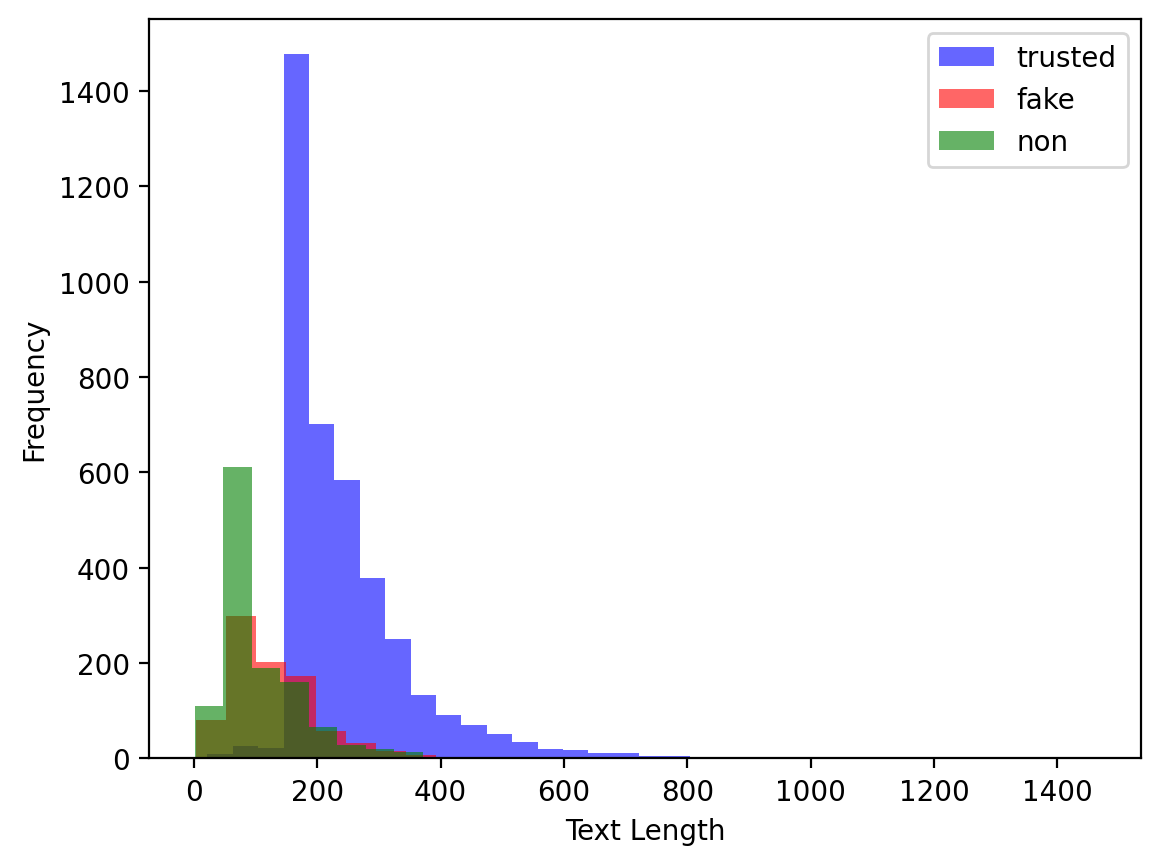

In [6]:
df[df.label=='trusted'].text_length.plot(bins=35, kind='hist', color='blue',
                                       label='trusted', alpha=0.6)
df[df.label == 'fake'].text_length.plot(kind='hist', color='red',
                                       label='fake', alpha=0.6)
df[df.label == 'non'].text_length.plot(kind='hist', color='green',
                                       label='non', alpha=0.6)
plt.legend()
plt.xlabel("Text Length")
plt.show()


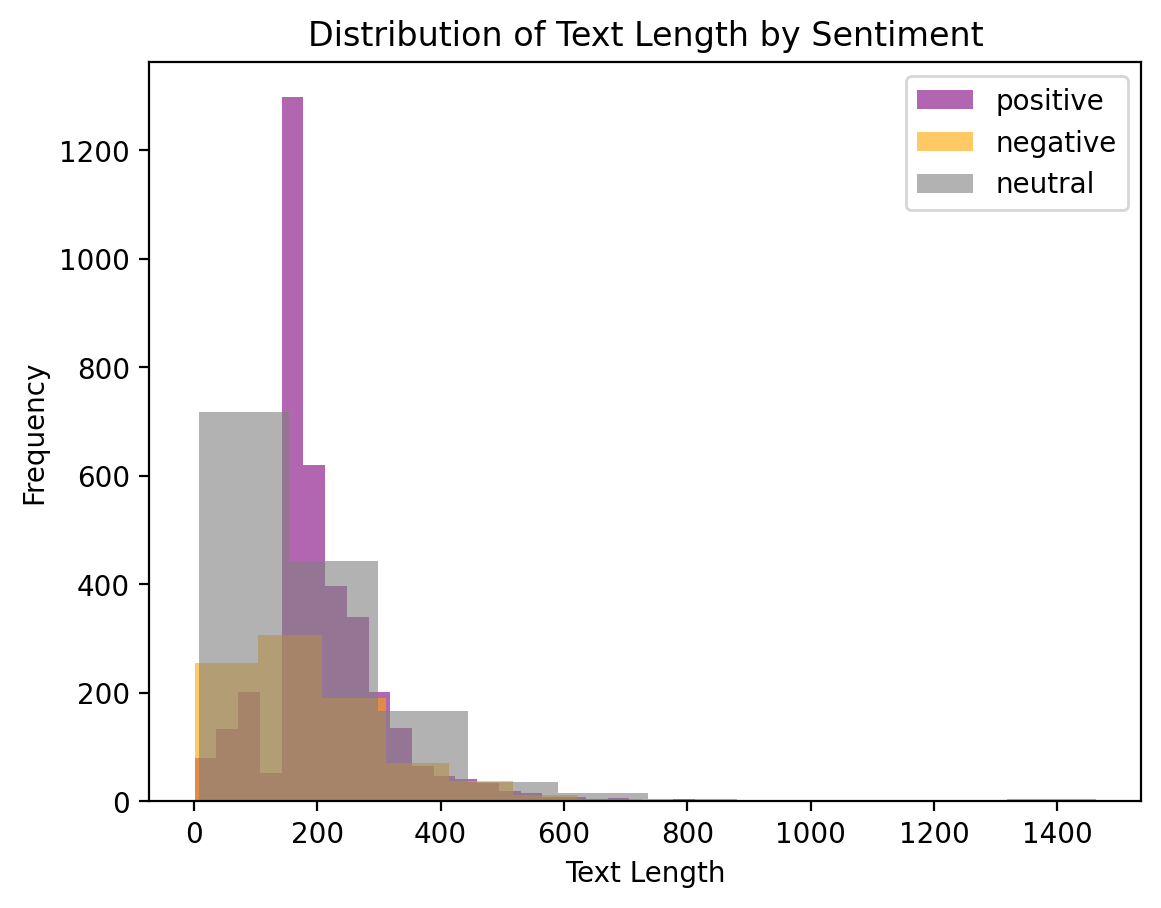

In [7]:
df[df.sentimen == 'positive'].text_length.plot(bins=35, kind='hist', color='purple',
                                               label='positive', alpha=0.6)
df[df.sentimen == 'negative'].text_length.plot(kind='hist', color='orange',
                                               label='negative', alpha=0.6)
df[df.sentimen == 'neutral'].text_length.plot(kind='hist', color='grey',
                                              label='neutral', alpha=0.6)

plt.legend()
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Distribution of Text Length by Sentiment")
plt.show()

In [8]:
df.groupby(['label']).count()

,username,rate,date,sentimen,reviews,produk,text_length
label,,,,,,,
fake,873,873,873,873,873,873,873
non,1203,1203,1203,1203,1203,1203,1203
trusted,3924,3924,3924,3924,3924,3924,3924


<Axes: xlabel='label', ylabel='count'>

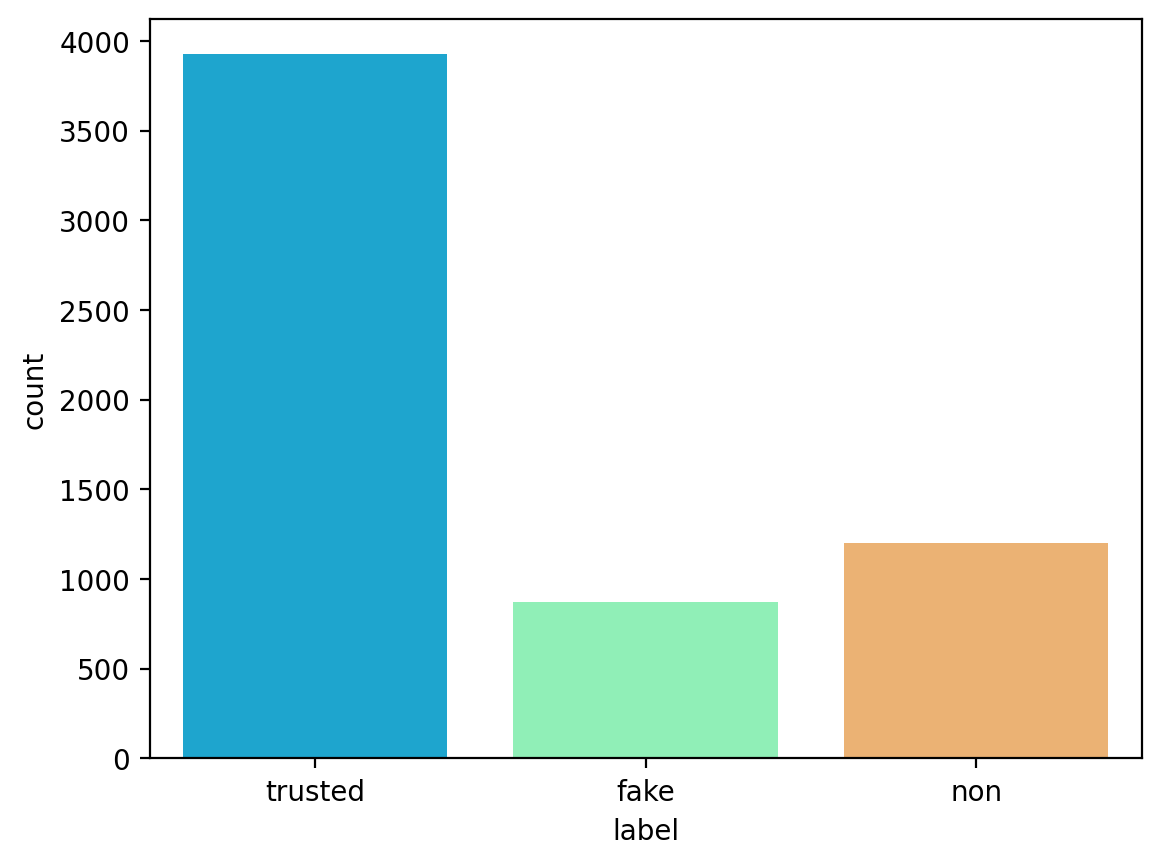

In [9]:
sns.countplot(x='label', data=df, palette='rainbow')

<Axes: xlabel='sentimen', ylabel='count'>

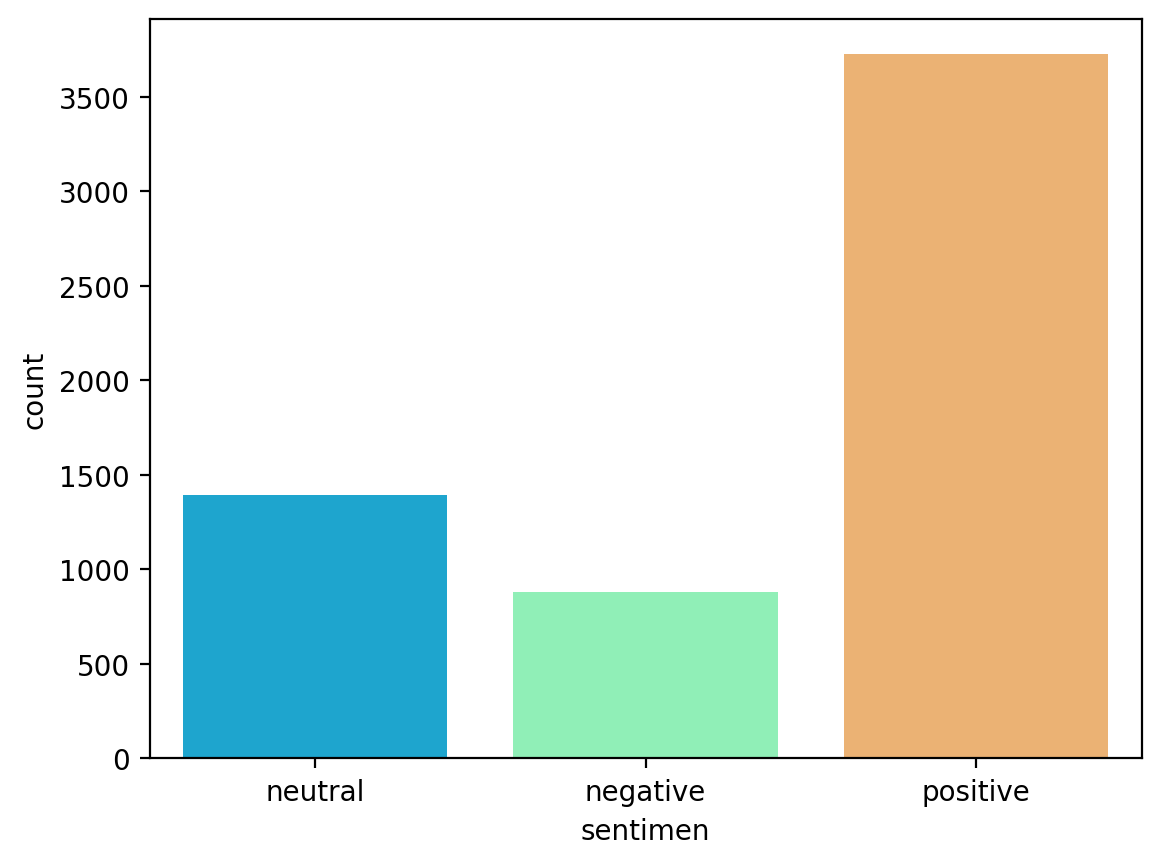

In [10]:
sns.countplot(x='sentimen', data=df, palette='rainbow')

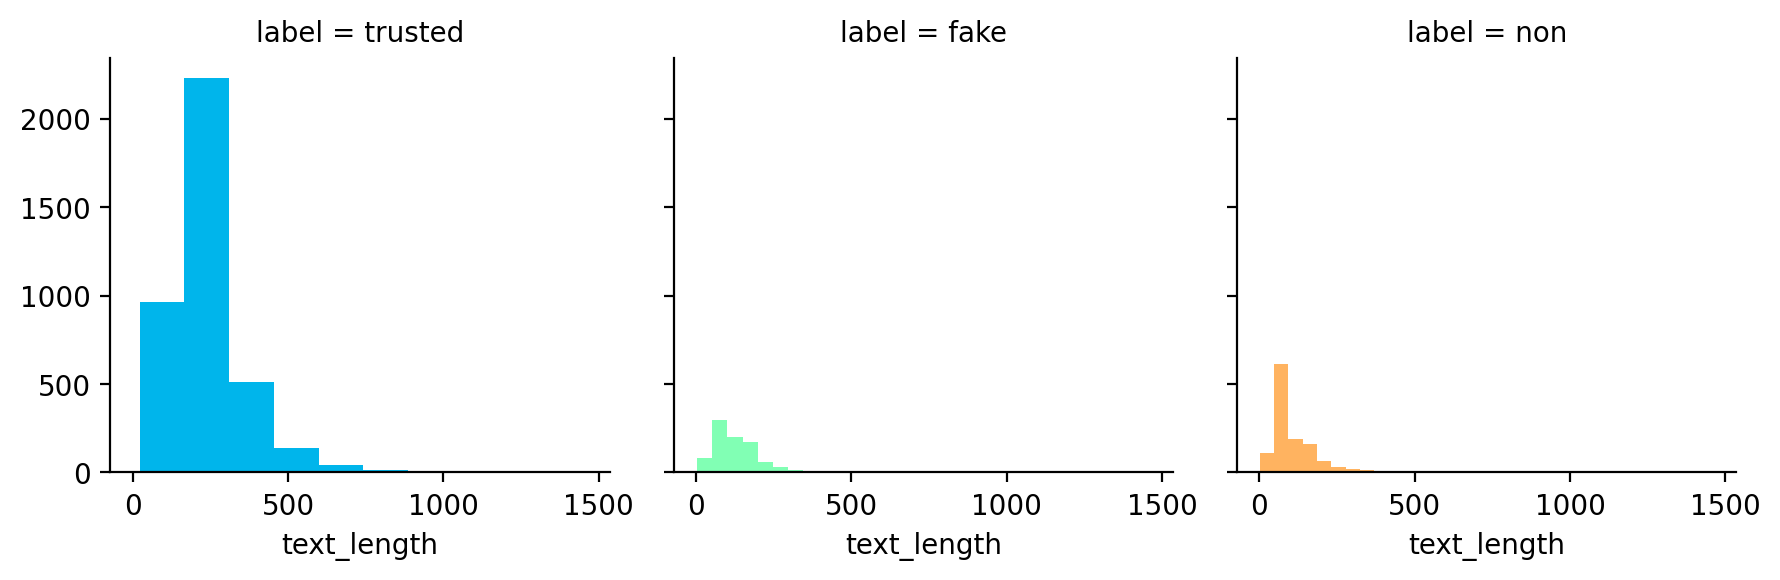

In [11]:
g = sns.FacetGrid(df, col='label', hue='label', palette='rainbow')
g.map(plt.hist, 'text_length')
plt.show()

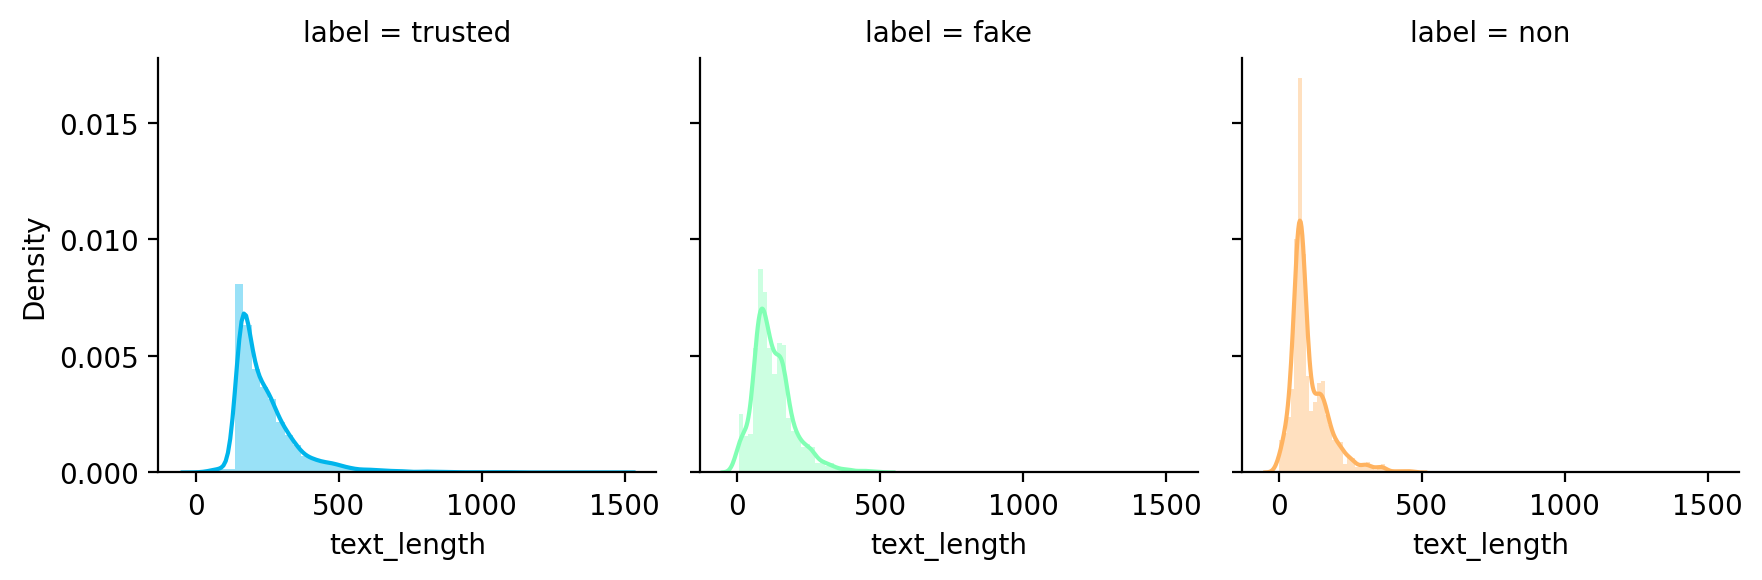

In [12]:
g = sns.FacetGrid(df, col='label', hue='label', palette='rainbow')
g.map(sns.distplot, 'text_length')

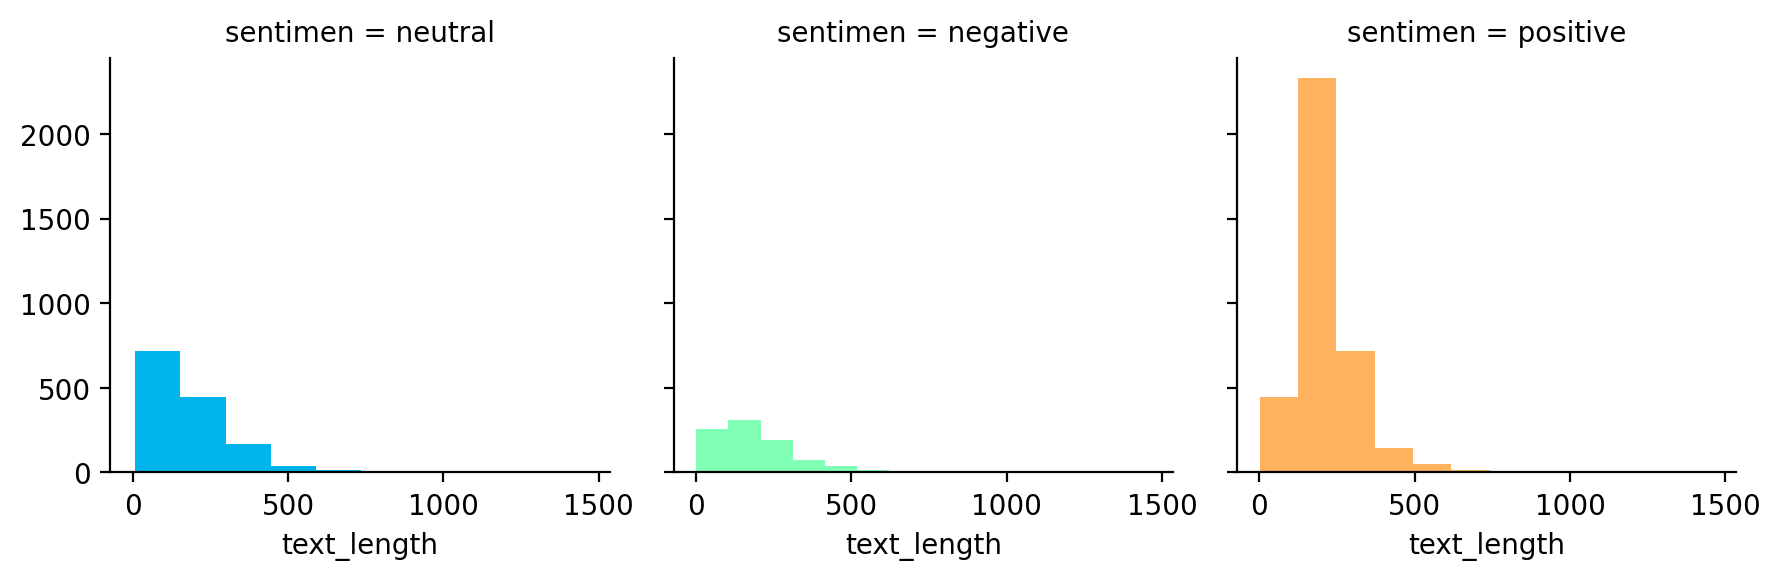

In [13]:
g = sns.FacetGrid(df, col='sentimen', hue='sentimen', palette='rainbow')
g.map(plt.hist, 'text_length')

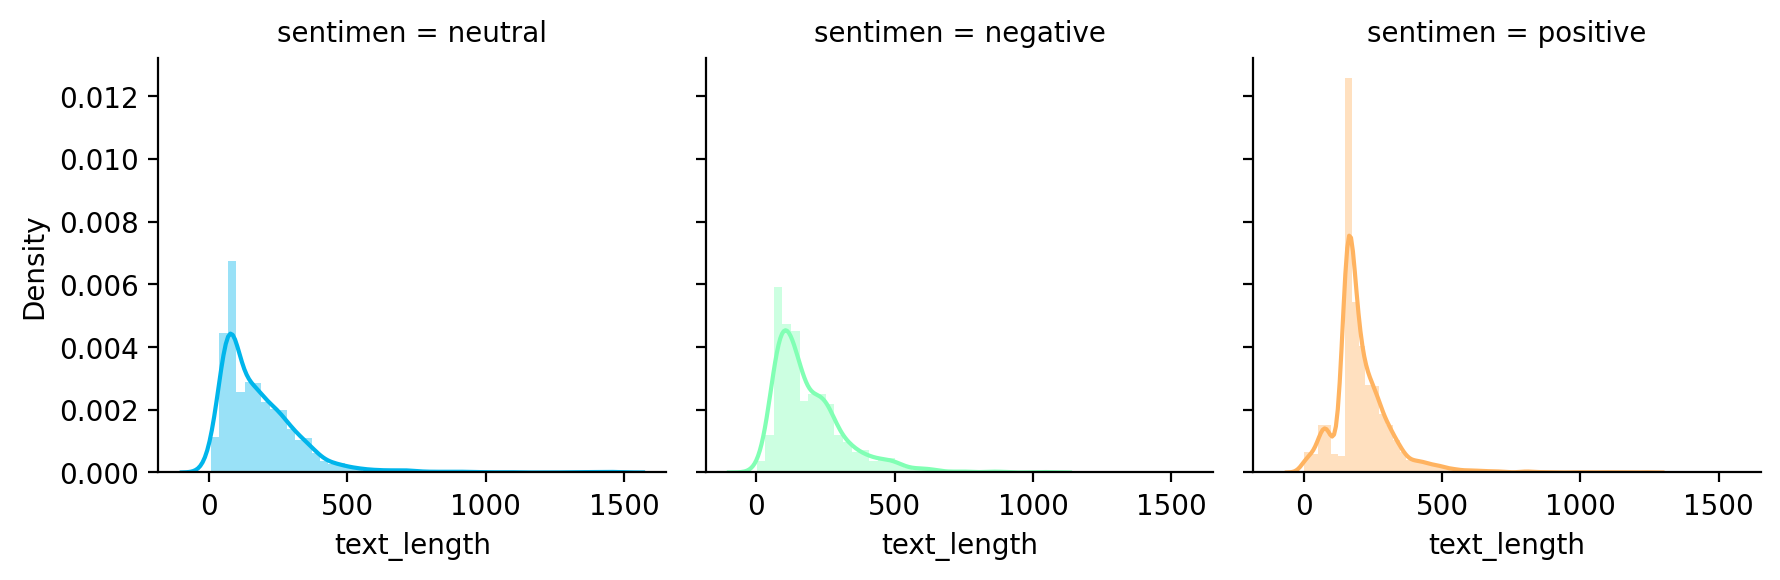

In [14]:
g = sns.FacetGrid(df, col='sentimen', hue='sentimen', palette='rainbow')
g.map(sns.distplot, 'text_length')

## Find Missing Value

In [15]:

print('Jumlah missing values disetiap kolom:\n', df.isnull().sum())

Jumlah missing values disetiap kolom:
  username      0
rate           0
date           0
label          0
sentimen       0
reviews        0
produk         0
text_length    0
dtype: int64


## Duplicate Handling

In [16]:
# Check for duplicates
duplicates = df.duplicated()

print("\nDuplicate Rows:")
print(df[duplicates])


Duplicate Rows:
Empty DataFrame
Columns: [ username, rate, date, label, sentimen, reviews, produk, text_length]
Index: []


In [17]:
# df = df.drop_duplicates()

## Outliers Handling



In [18]:
df['text_length'] = df['reviews'].apply(len)

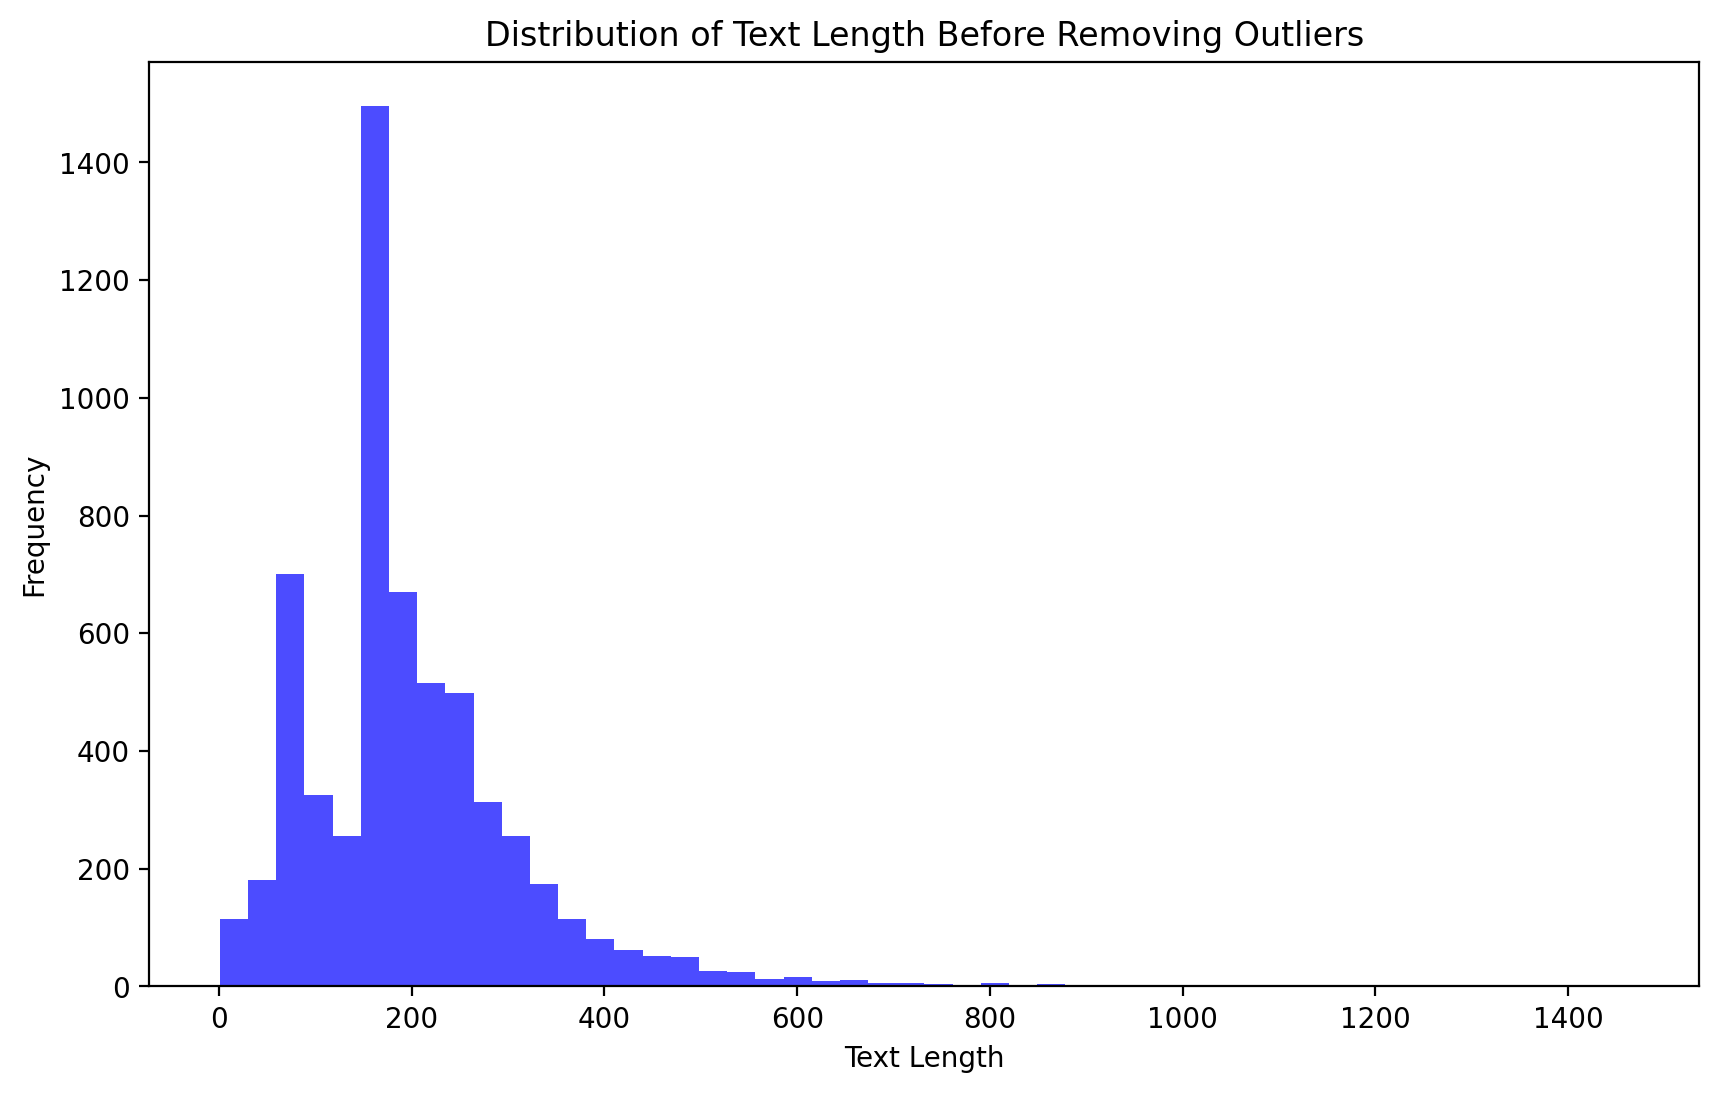

In [19]:
# Plot sebelum menghapus outlier
plt.figure(figsize=(10, 6))
df['text_length'].plot(kind='hist', bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Text Length Before Removing Outliers')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [20]:
df.label.value_counts()

,count
label,
trusted,3924
non,1203
fake,873


In [21]:
df.sentimen.value_counts()

,count
sentimen,
positive,3725
neutral,1392
negative,883


### Review

In [22]:
# Q1 = df[df['label'] == 'fake']['text_length'].quantile(0.25)
# Q3 = df[df['label'] == 'fake']['text_length'].quantile(0.75)
# IQR = Q3 - Q1

# df = df[~((df['text_length'] < (Q1-1.5*IQR)) | (df['text_length'] > (Q3+1.5*IQR)))]

In [23]:
# Q1 = df[df['label'] == 'trusted']['text_length'].quantile(0.25)
# Q3 = df[df['label'] == 'trusted']['text_length'].quantile(0.75)
# IQR = Q3 - Q1

# df = df[~((df['text_length'] < (Q1-1.5*IQR)) | (df['text_length'] > (Q3+1.5*IQR)))]

In [24]:
# Q1 = df[df['label'] == 'non']['text_length'].quantile(0.25)
# Q3 = df[df['label'] == 'non']['text_length'].quantile(0.75)
# IQR = Q3 - Q1

# df = df[~((df['text_length'] < (Q1-1.5*IQR)) | (df['text_length'] > (Q3+1.5*IQR)))]

<Axes: xlabel='label', ylabel='text_length'>

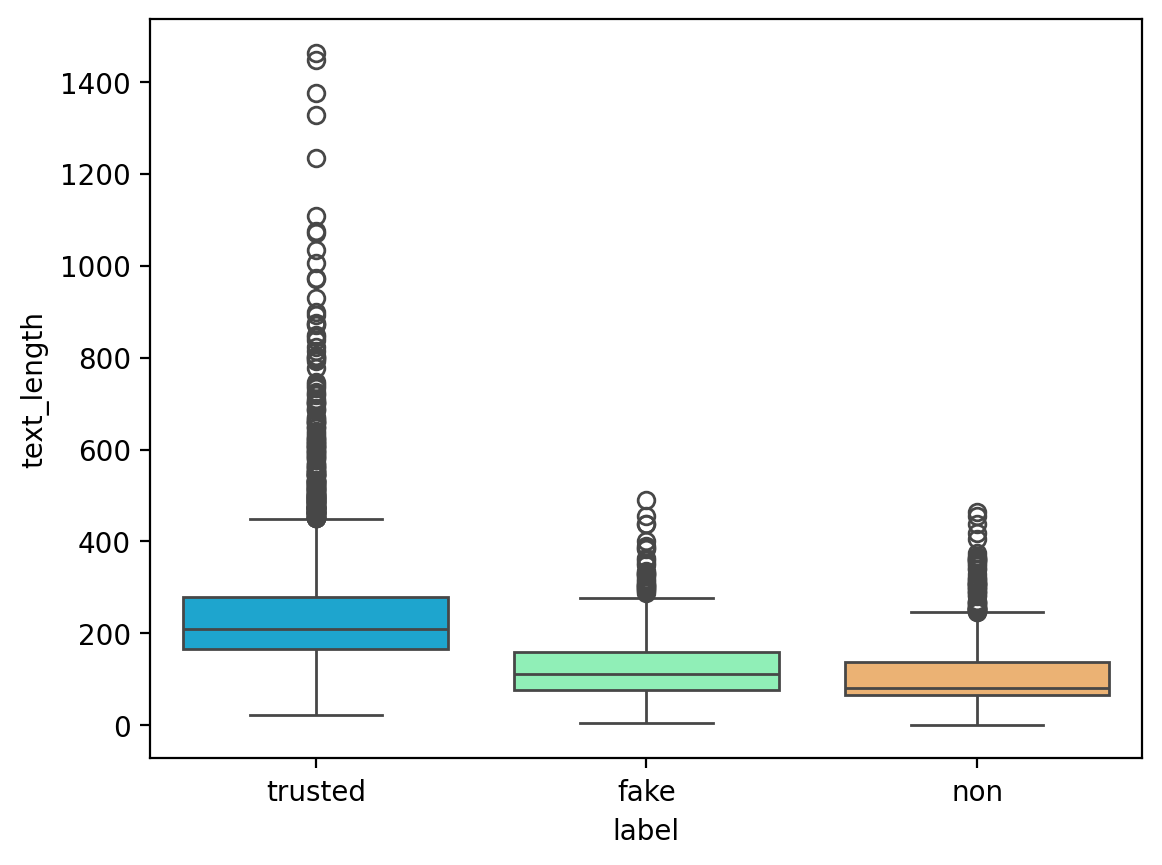

In [25]:
sns.boxplot(x='label',y='text_length',data=df,palette='rainbow')

### Sentimen

In [26]:
# Q1 = df[df['sentimen'] == 'positive']['text_length'].quantile(0.25)
# Q3 = df[df['sentimen'] == 'positive']['text_length'].quantile(0.75)
# IQR = Q3 - Q1

# df = df[~((df['text_length'] < (Q1-1.5*IQR)) | (df['text_length'] > (Q3+1.5*IQR)))]

In [27]:
# Q1 = df[df['sentimen'] == 'negative']['text_length'].quantile(0.25)
# Q3 = df[df['sentimen'] == 'negative']['text_length'].quantile(0.75)
# IQR = Q3 - Q1

# df = df[~((df['text_length'] < (Q1-1.5*IQR)) | (df['text_length'] > (Q3+1.5*IQR)))]

In [28]:
# Q1 = df[df['sentimen'] == 'neutral']['text_length'].quantile(0.25)
# Q3 = df[df['sentimen'] == 'neutral']['text_length'].quantile(0.75)
# IQR = Q3 - Q1

# df = df[~((df['text_length'] < (Q1-1.5*IQR)) | (df['text_length'] > (Q3+1.5*IQR)))]

<Axes: xlabel='sentimen', ylabel='text_length'>

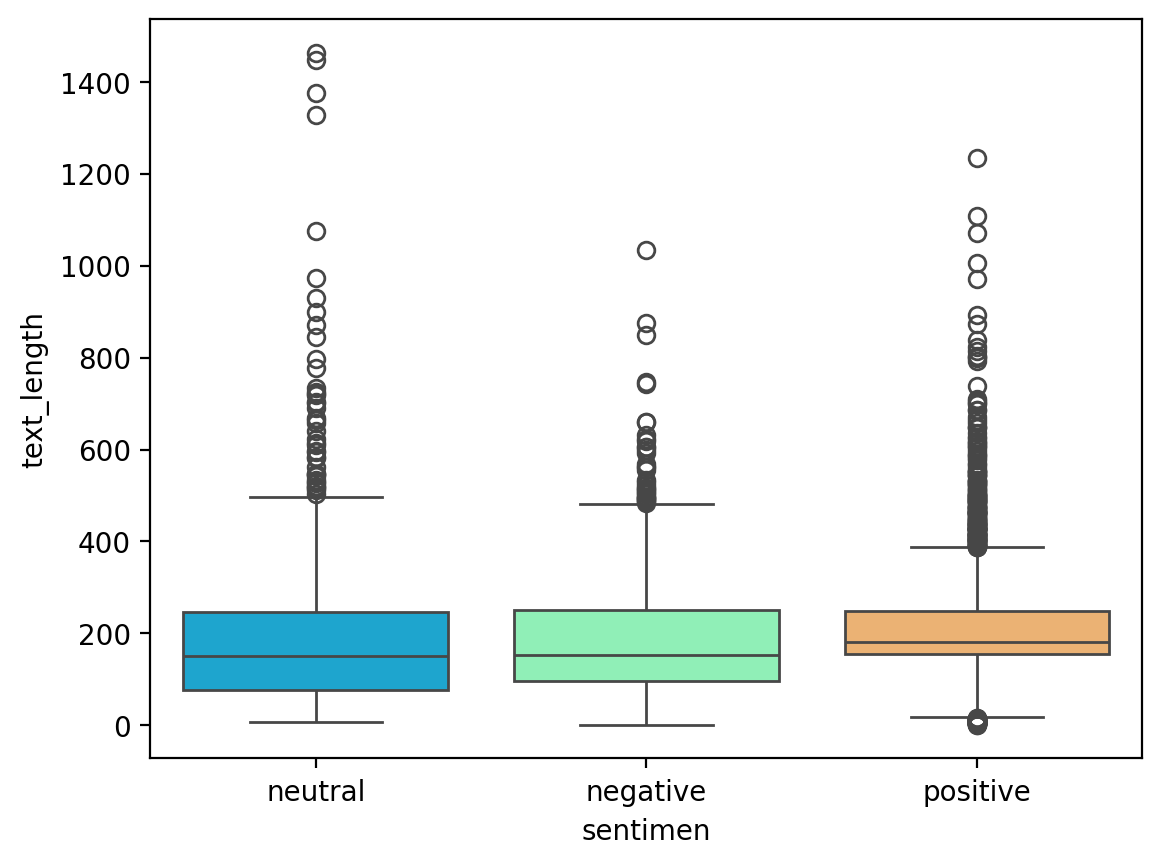

In [29]:
sns.boxplot(x='sentimen',y='text_length',data=df,palette='rainbow')

### Using Isolation Forest

In [30]:
#Isolation Forest

from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['anomaly_score'] = iso_forest.fit_predict(df[['text_length']])
df = df[df['anomaly_score'] == 1]



## Show Final Distrubution & Outlier

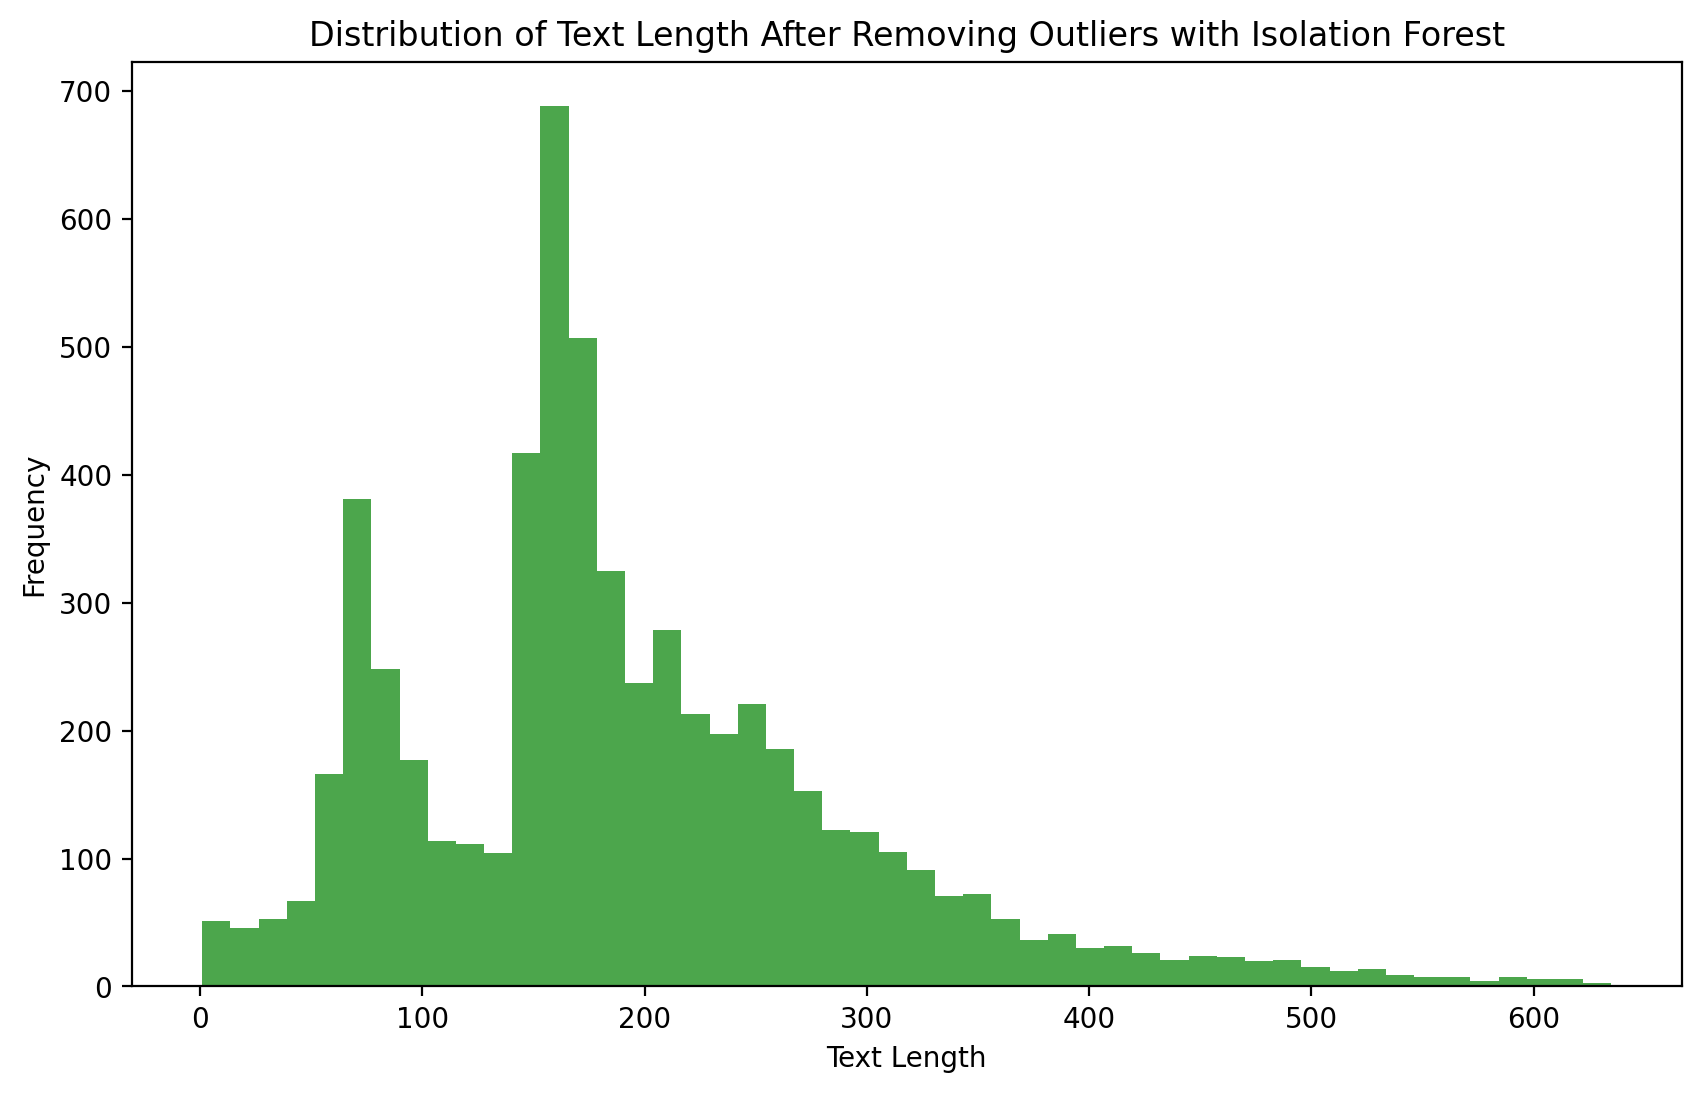

In [31]:
plt.figure(figsize=(10, 6))
df['text_length'].plot(kind='hist', bins=50, color='green', alpha=0.7)
plt.title('Distribution of Text Length After Removing Outliers with Isolation Forest')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

### Review

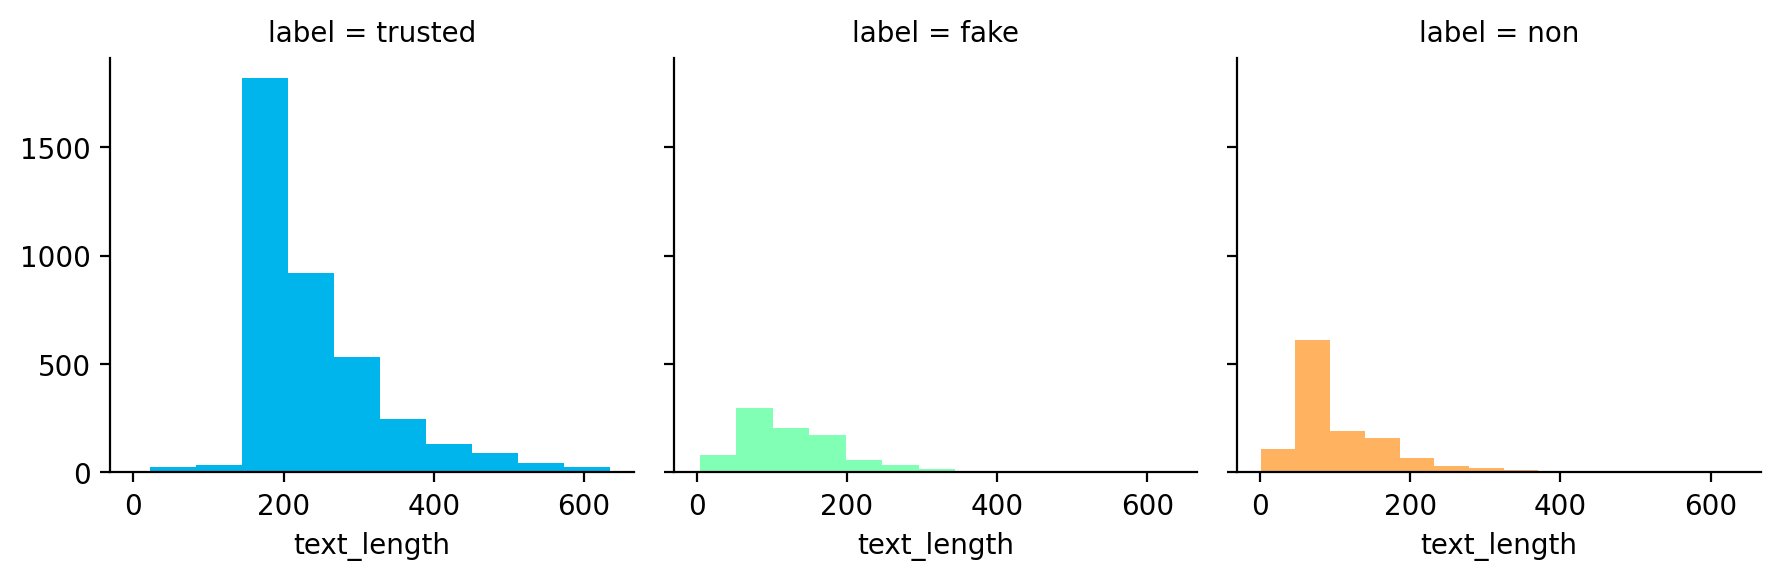

In [32]:
g = sns.FacetGrid(df, col='label', hue='label', palette='rainbow')
g.map(plt.hist, 'text_length')

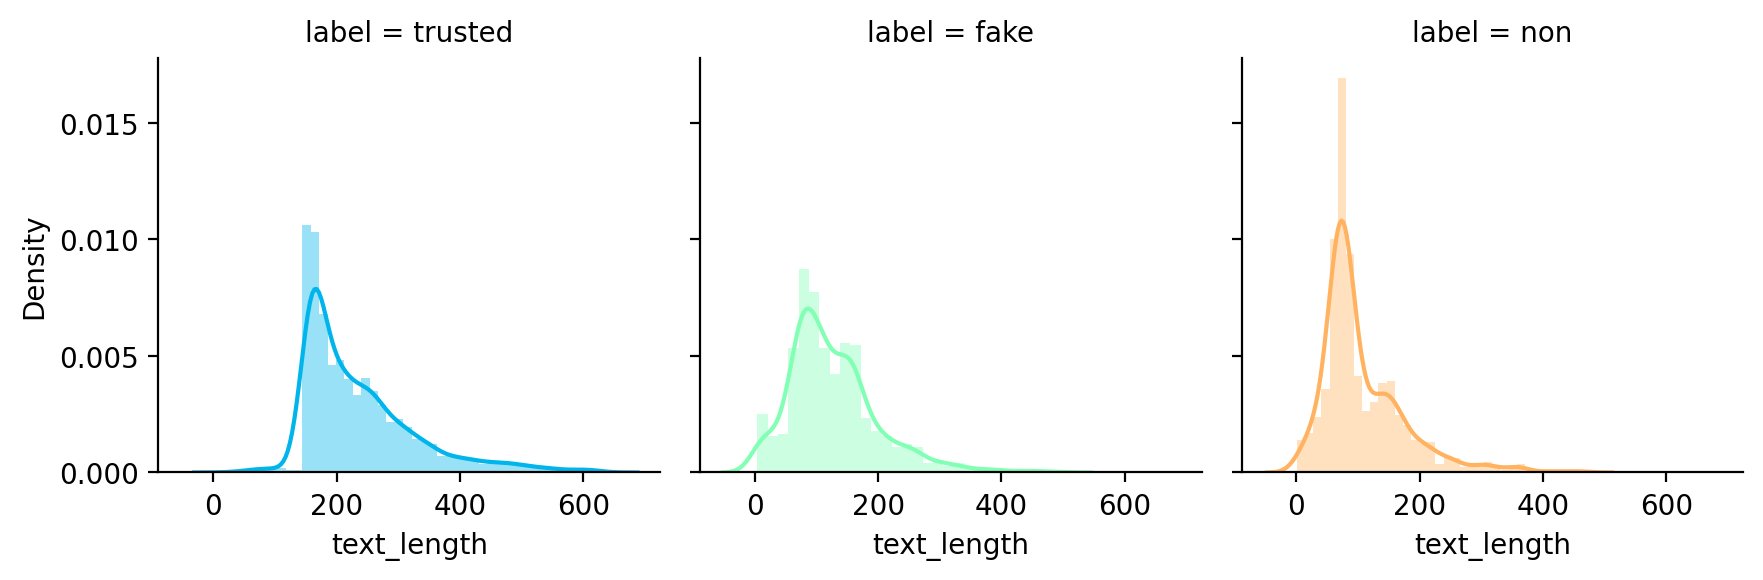

In [33]:
g = sns.FacetGrid(df, col='label', hue='label', palette='rainbow')
g.map(sns.distplot, 'text_length')

<Axes: xlabel='label', ylabel='text_length'>

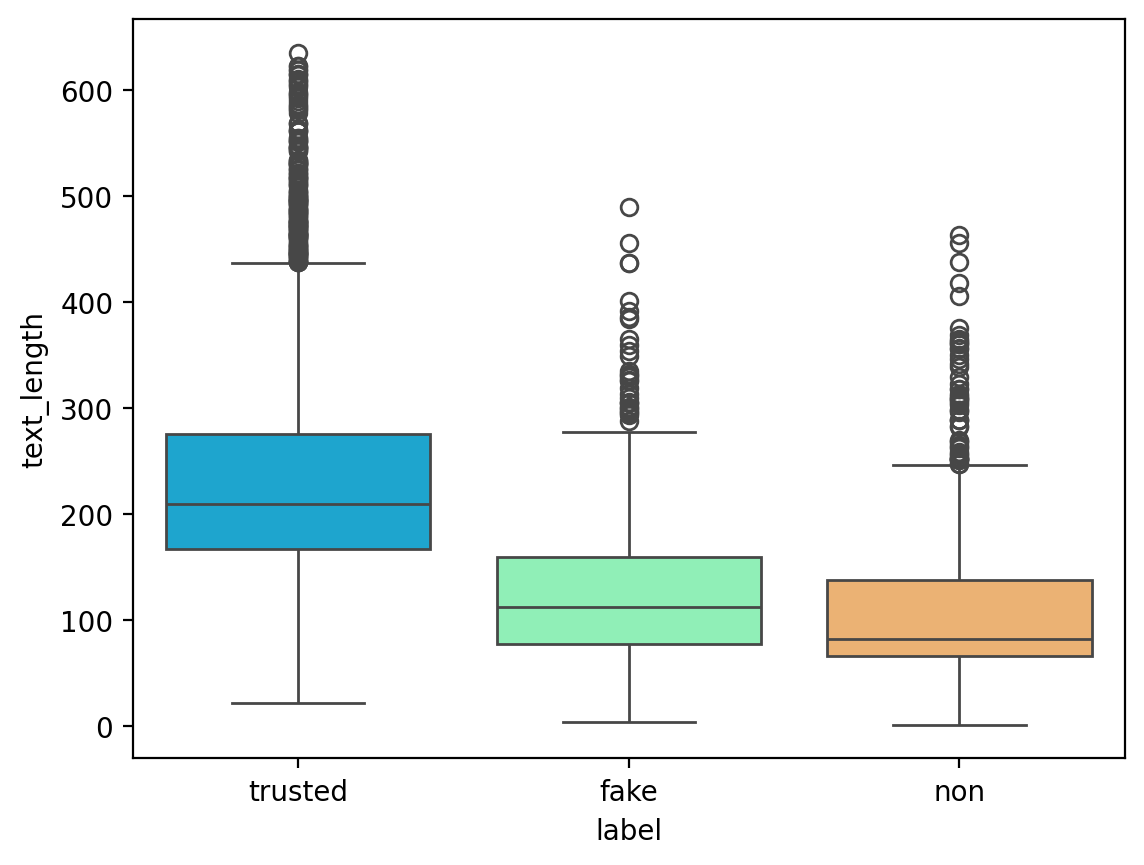

In [34]:
sns.boxplot(x='label',y='text_length',data=df,palette='rainbow')

### Sentimen

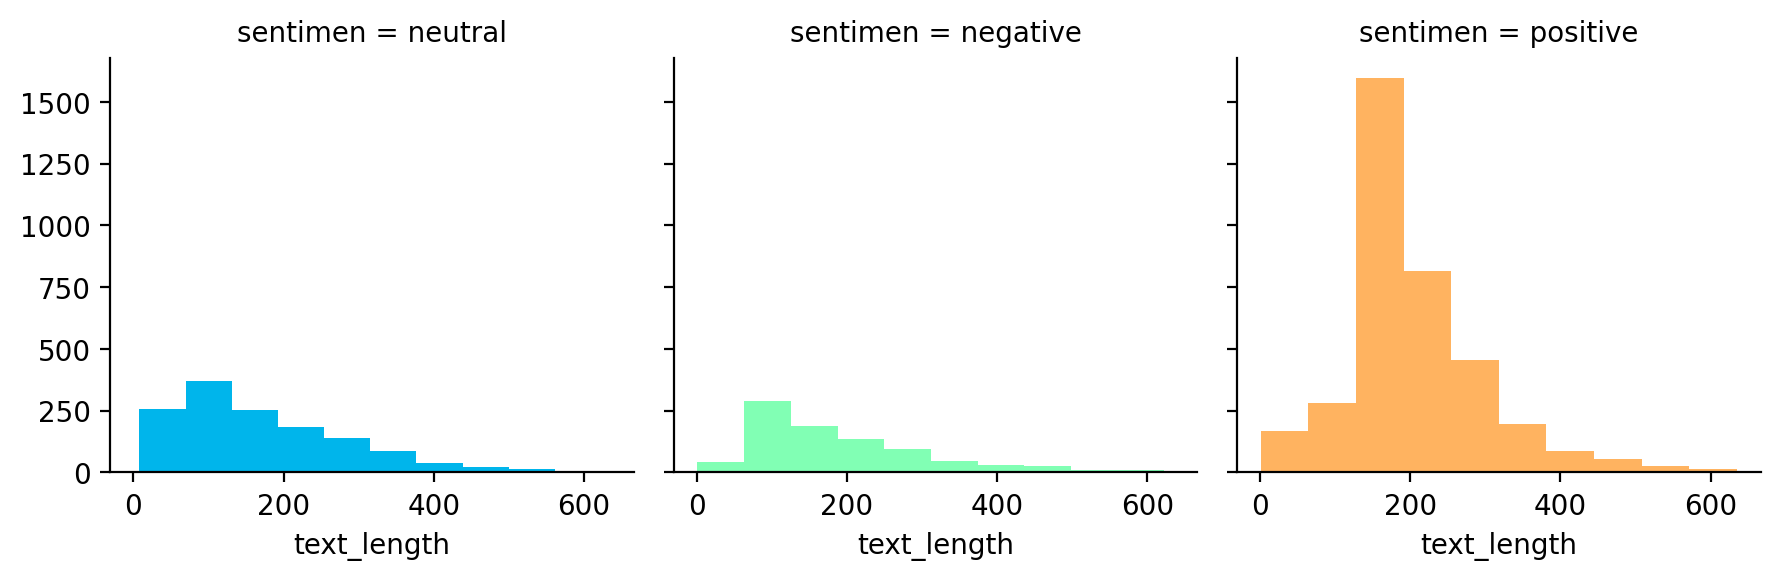

In [35]:
g = sns.FacetGrid(df, col='sentimen', hue='sentimen', palette='rainbow')
g.map(plt.hist, 'text_length')

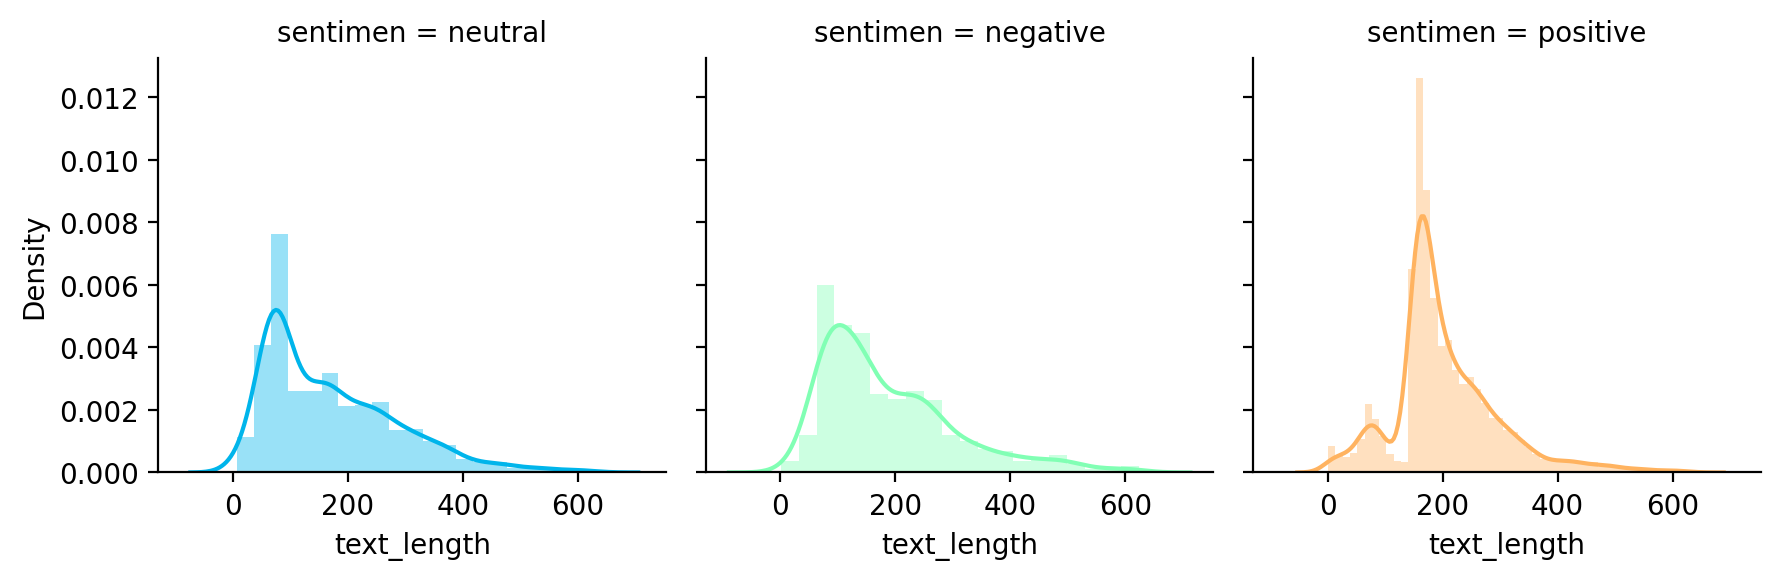

In [36]:
g = sns.FacetGrid(df, col='sentimen', hue='sentimen', palette='rainbow')
g.map(sns.distplot, 'text_length')

<Axes: xlabel='sentimen', ylabel='text_length'>

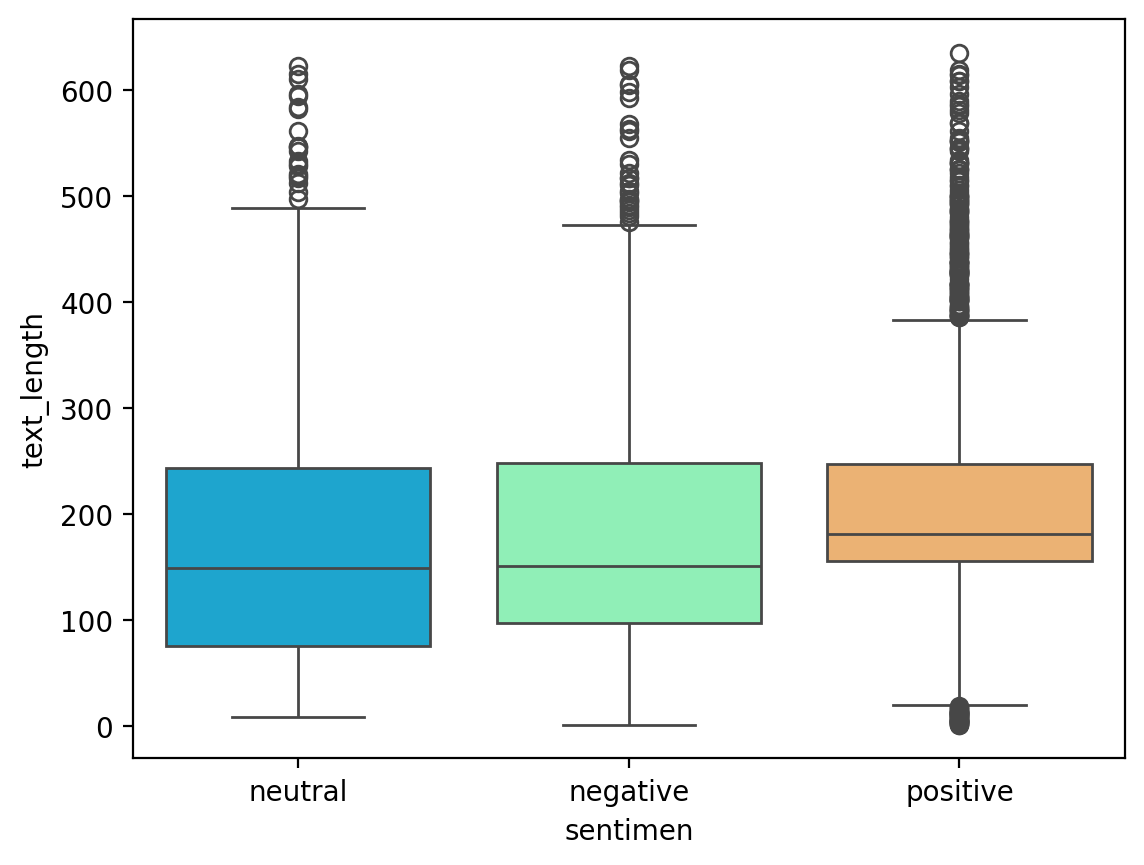

In [37]:
sns.boxplot(x='sentimen',y='text_length',data=df,palette='rainbow')

## Imbalance Class Handling

### Review

In [38]:
df.label.value_counts()

,count
label,
trusted,3864
non,1203
fake,873


In [39]:
# Resample data
label_trusted = resample(df[df['label'] == 'trusted'],
                                 replace=True,
                                 n_samples=2000,
                                 random_state=123)

label_fake = resample(df[df['label'] == 'fake'],
                                 replace=True,
                                 n_samples=2000,
                                 random_state=123)

label_non = resample(df[df['label'] == 'non'],
                                 replace=True,
                                 n_samples=2000,
                                 random_state=123)

# Gabung ulang
df = pd.concat([label_trusted, label_fake, label_non])

df.label.value_counts()

,count
label,
trusted,2000
fake,2000
non,2000


<Axes: xlabel='label', ylabel='count'>

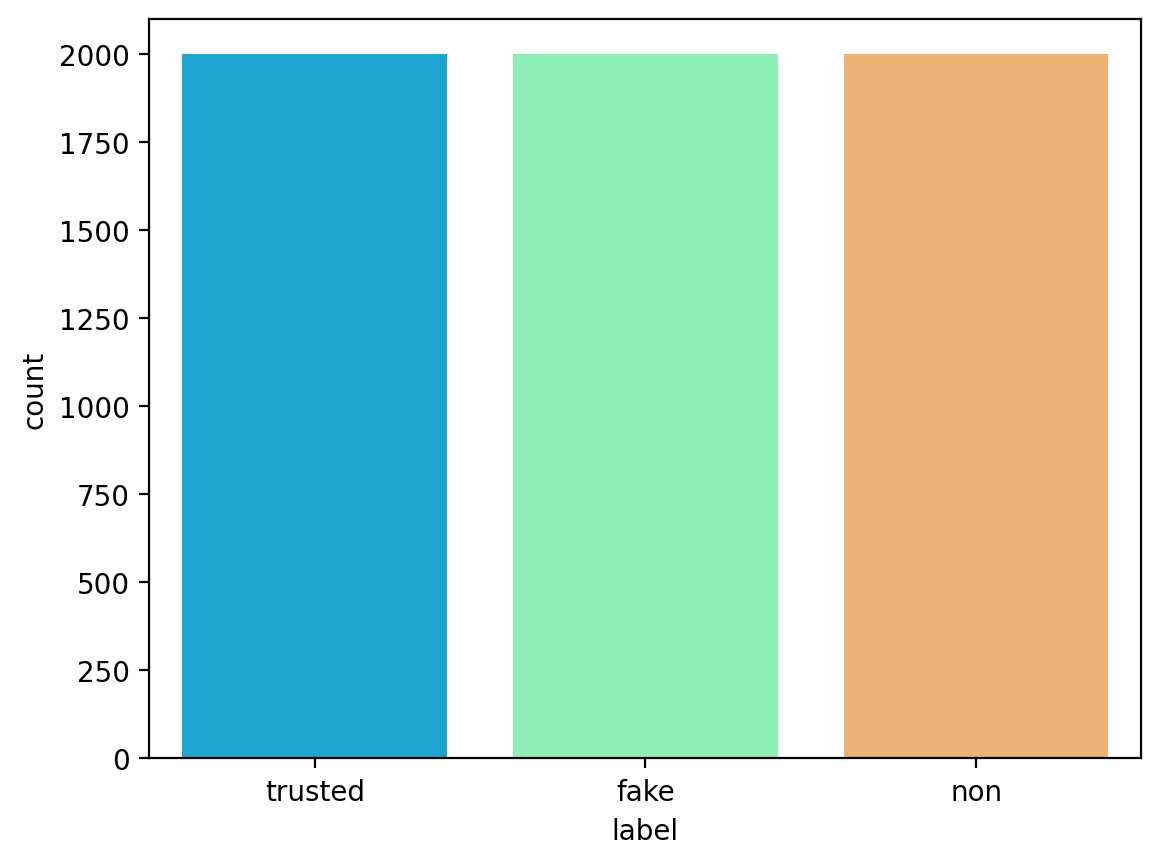

In [40]:
sns.countplot(x='label', data=df, palette='rainbow')

### Sentimen


In [41]:
df.sentimen.value_counts()

,count
sentimen,
positive,2989
neutral,1754
negative,1257


In [42]:
# Resample data
sentimen_neutral = resample(df[df['sentimen'] == 'neutral'],
                                 replace=True,
                                 n_samples=2000,
                                 random_state=123)

sentimen_positive = resample(df[df['sentimen'] == 'positive'],
                                 replace=True,
                                 n_samples=2000,
                                 random_state=123)

sentimen_negative = resample(df[df['sentimen'] == 'negative'],
                                 replace=True,
                                 n_samples=2000,
                                 random_state=123)

# Gabung ulang
df = pd.concat([sentimen_neutral, sentimen_positive, sentimen_negative])

df.sentimen.value_counts()

,count
sentimen,
neutral,2000
positive,2000
negative,2000


<Axes: xlabel='sentimen', ylabel='count'>

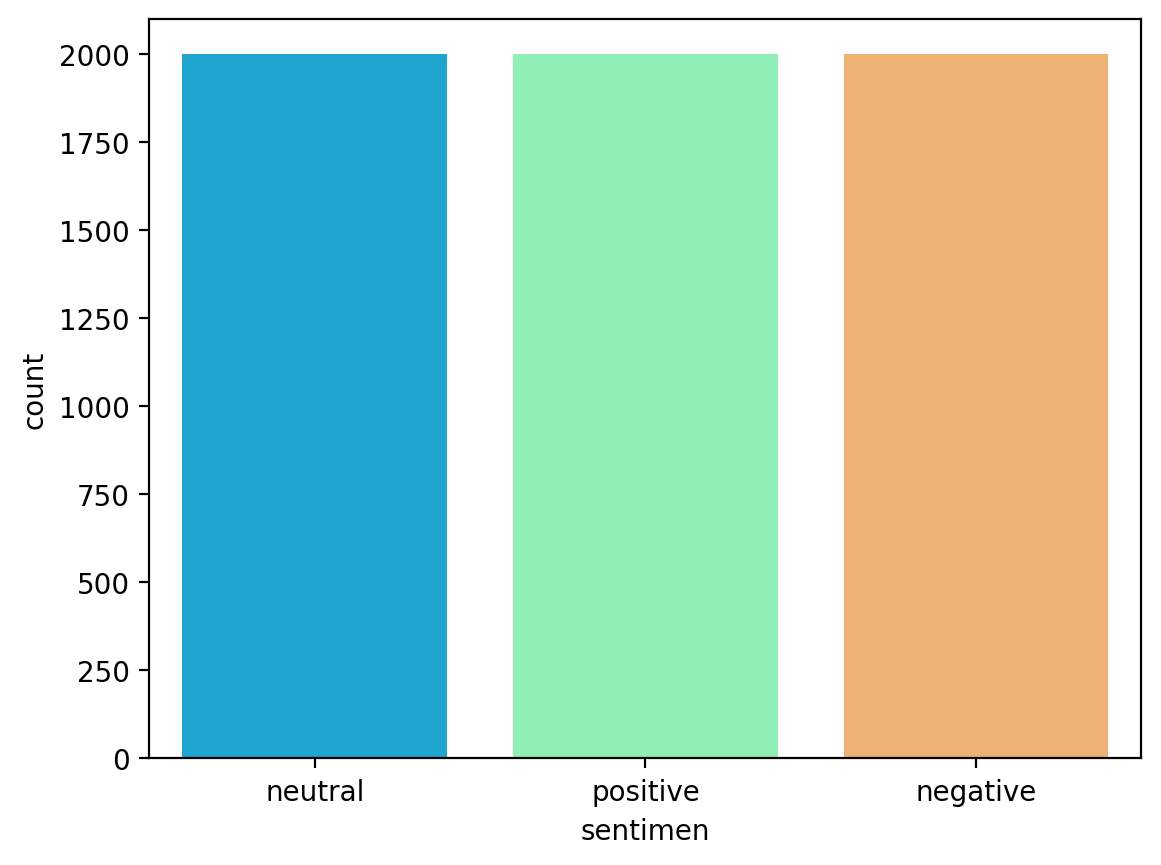

In [43]:
sns.countplot(x='sentimen', data=df, palette='rainbow')

# Data Preparation

## Features Engeneering


## Data Cleanning

### To Lowercase, Case folding

In [44]:
# merubah jenis huruf menjadi huruf kecil
def lowercase(review_text):
  low = review_text.lower()
  return low

df['lowercase_reviews'] = df['reviews'].apply(lambda low:lowercase(str(low)))

In [45]:
df[['reviews', 'lowercase_reviews']]

,reviews,lowercase_reviews
2711,Tiktok menyediakan berbagai pilihan sunscreen ...,tiktok menyediakan berbagai pilihan sunscreen ...
2240,"barang sampai dengan aman, tanpa masalah.","barang sampai dengan aman, tanpa masalah."
2524,Pengiriman gratis seringkali menjadi daya tari...,pengiriman gratis seringkali menjadi daya tari...
2552,Belanja online memungkinkan pelanggan membandi...,belanja online memungkinkan pelanggan membandi...
2627,Seller yang menyediakan berbagai opsi pembayar...,seller yang menyediakan berbagai opsi pembayar...
...,...,...
1757,Kulit di sekitar mata saya menjadi iritasi dan...,kulit di sekitar mata saya menjadi iritasi dan...
2371,Website belanja online sering banget error pas...,website belanja online sering banget error pas...
1875,TOPP BELI SKINCARE SELAIN DI OFFICIAL!! Hampir...,topp beli skincare selain di official!! hampir...
1589,Banyak banget hoax yang beredar di media sosia...,banyak banget hoax yang beredar di media sosia...


### Remove Emoji

In [46]:
# menghapus emoji menggunakan regex dan nilai unicode dari emoji

def remove_emoji(review_text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', review_text)

df['no_emoji_reviews'] = df['lowercase_reviews'].apply(lambda emoji: remove_emoji(emoji))

In [47]:
df[['reviews', 'no_emoji_reviews']]

,reviews,no_emoji_reviews
2711,Tiktok menyediakan berbagai pilihan sunscreen ...,tiktok menyediakan berbagai pilihan sunscreen ...
2240,"barang sampai dengan aman, tanpa masalah.","barang sampai dengan aman, tanpa masalah."
2524,Pengiriman gratis seringkali menjadi daya tari...,pengiriman gratis seringkali menjadi daya tari...
2552,Belanja online memungkinkan pelanggan membandi...,belanja online memungkinkan pelanggan membandi...
2627,Seller yang menyediakan berbagai opsi pembayar...,seller yang menyediakan berbagai opsi pembayar...
...,...,...
1757,Kulit di sekitar mata saya menjadi iritasi dan...,kulit di sekitar mata saya menjadi iritasi dan...
2371,Website belanja online sering banget error pas...,website belanja online sering banget error pas...
1875,TOPP BELI SKINCARE SELAIN DI OFFICIAL!! Hampir...,topp beli skincare selain di official!! hampir...
1589,Banyak banget hoax yang beredar di media sosia...,banyak banget hoax yang beredar di media sosia...


### Remove Hastag


In [48]:
# menghapus hashtag dari ulasan yang biasanya digunakan oleh pengguna untuk memberikan tagar

def remove_hashtag(review_text, default_replace=""):
  hashtag = re.sub(r'#\w+', default_replace, review_text)
  return hashtag

df['no_hastag_reviews'] = df['no_emoji_reviews'].apply(lambda hashtag: remove_hashtag(hashtag))

In [49]:
df[['reviews','no_hastag_reviews',]]

,reviews,no_hastag_reviews
2711,Tiktok menyediakan berbagai pilihan sunscreen ...,tiktok menyediakan berbagai pilihan sunscreen ...
2240,"barang sampai dengan aman, tanpa masalah.","barang sampai dengan aman, tanpa masalah."
2524,Pengiriman gratis seringkali menjadi daya tari...,pengiriman gratis seringkali menjadi daya tari...
2552,Belanja online memungkinkan pelanggan membandi...,belanja online memungkinkan pelanggan membandi...
2627,Seller yang menyediakan berbagai opsi pembayar...,seller yang menyediakan berbagai opsi pembayar...
...,...,...
1757,Kulit di sekitar mata saya menjadi iritasi dan...,kulit di sekitar mata saya menjadi iritasi dan...
2371,Website belanja online sering banget error pas...,website belanja online sering banget error pas...
1875,TOPP BELI SKINCARE SELAIN DI OFFICIAL!! Hampir...,topp beli skincare selain di official!! hampir...
1589,Banyak banget hoax yang beredar di media sosia...,banyak banget hoax yang beredar di media sosia...


### Remove Punctuation & Number

In [50]:
# menghapus angka dalam ulasan

def remove_number(review_text, default_replace=" "):
  num = re.sub(r'\d+', default_replace, review_text)
  return num

df['no_number_reviews'] = df['no_hastag_reviews'].apply(lambda num: remove_number(num))

In [51]:
# menghapus tanda baca

def remove_punctuation(review_text, default_text=" "):
  list_punct = string.punctuation
  delete_punct = str.maketrans(list_punct,' '*len(list_punct))
  new_review = ' '.join(review_text.translate(delete_punct).split())

  return new_review

df['no_atribut_reviews'] = df['no_number_reviews'].apply(lambda punct: remove_punctuation(punct))

In [52]:
# menghapus superscript dalam ulasan yang biasa digunakan oleh pengguna dalam mengulangi kata

def remove_superscript(review_text):
  number = re.compile("["u"\U00002070"
                      u"\U000000B9"
                      u"\U000000B2-\U000000B3"
                      u"\U00002074-\U00002079"
                      u"\U0000207A-\U0000207E"
                      u"U0000200D"
                      "]+", flags=re.UNICODE)
  return number.sub(r'', review_text)

df['no_atribut_reviews'] = df['no_atribut_reviews'].apply(lambda num: remove_superscript(num))

In [53]:
def remove_text_special(review_text):
    # Hapus tab, newline, dan backslash
    review_text = review_text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")

    # Hapus simbol
    review_text = re.sub(r'[^a-zA-Z\s]', '', review_text)

    # Hapus karakter non-ASCII
    review_text = review_text.encode('ascii', 'replace').decode('ascii')

    # Hapus URL
    review_text = re.sub(r'http\S+', '', review_text)

    return review_text

# Contoh pemanggilan fungsi pada kolom 'no_atribut_reviews'
df['no_atribut_reviews'] = df['no_atribut_reviews'].apply(remove_text_special)


In [54]:
df[['reviews','no_atribut_reviews',]]

,reviews,no_atribut_reviews
2711,Tiktok menyediakan berbagai pilihan sunscreen ...,tiktok menyediakan berbagai pilihan sunscreen ...
2240,"barang sampai dengan aman, tanpa masalah.",barang sampai dengan aman tanpa masalah
2524,Pengiriman gratis seringkali menjadi daya tari...,pengiriman gratis seringkali menjadi daya tari...
2552,Belanja online memungkinkan pelanggan membandi...,belanja online memungkinkan pelanggan membandi...
2627,Seller yang menyediakan berbagai opsi pembayar...,seller yang menyediakan berbagai opsi pembayar...
...,...,...
1757,Kulit di sekitar mata saya menjadi iritasi dan...,kulit di sekitar mata saya menjadi iritasi dan...
2371,Website belanja online sering banget error pas...,website belanja online sering banget error pas...
1875,TOPP BELI SKINCARE SELAIN DI OFFICIAL!! Hampir...,topp beli skincare selain di official hampir k...
1589,Banyak banget hoax yang beredar di media sosia...,banyak banget hoax yang beredar di media sosia...


### Remove Repetition

In [55]:
# melakukan pembatasan jumlah huruf menjadi dua untuk mengembalikan kata ke bentuk awal
# dan menghindari terjadinya kata ganda yang memiliki arti sama tetapi berbeda penulisan

def word_repetition(review_text):
  review = re.sub(r'(.)\1+', r'\1\1', review_text)
  return review

df['no_repetition_reviews'] = df['no_atribut_reviews'].apply(lambda word: word_repetition(word))

In [56]:
# melakukan pembatasan kata berulang menjadi satu kali, seperti suka suka -> suka

def repetition(review_text):
  repeat = re.sub(r'\b(\w+)(?:\W\1\b)+', r'\1',review_text, flags=re.IGNORECASE)
  return repeat

df['no_repetition_reviews'] = df['no_repetition_reviews'].apply(lambda word: repetition(word))

In [57]:
df[['reviews','no_repetition_reviews',]]

,reviews,no_repetition_reviews
2711,Tiktok menyediakan berbagai pilihan sunscreen ...,tiktok menyediakan berbagai pilihan sunscreen ...
2240,"barang sampai dengan aman, tanpa masalah.",barang sampai dengan aman tanpa masalah
2524,Pengiriman gratis seringkali menjadi daya tari...,pengiriman gratis seringkali menjadi daya tari...
2552,Belanja online memungkinkan pelanggan membandi...,belanja online memungkinkan pelanggan membandi...
2627,Seller yang menyediakan berbagai opsi pembayar...,seller yang menyediakan berbagai opsi pembayar...
...,...,...
1757,Kulit di sekitar mata saya menjadi iritasi dan...,kulit di sekitar mata saya menjadi iritasi dan...
2371,Website belanja online sering banget error pas...,website belanja online sering banget error pas...
1875,TOPP BELI SKINCARE SELAIN DI OFFICIAL!! Hampir...,topp beli skincare selain di official hampir k...
1589,Banyak banget hoax yang beredar di media sosia...,banyak banget hoax yang beredar di media sosia...


### Remove Whitespace

In [58]:
# menghapus spasi berlebih dalam ulasan

def remove_extra_whitespaces(review_text):
  review = re.sub(r'\s+',' ', review_text)
  return review

df['no_whitespace_reviews'] = df['no_repetition_reviews'].apply(lambda extra_spaces: remove_extra_whitespaces(extra_spaces))

In [59]:
df[['reviews','no_whitespace_reviews',]]

,reviews,no_whitespace_reviews
2711,Tiktok menyediakan berbagai pilihan sunscreen ...,tiktok menyediakan berbagai pilihan sunscreen ...
2240,"barang sampai dengan aman, tanpa masalah.",barang sampai dengan aman tanpa masalah
2524,Pengiriman gratis seringkali menjadi daya tari...,pengiriman gratis seringkali menjadi daya tari...
2552,Belanja online memungkinkan pelanggan membandi...,belanja online memungkinkan pelanggan membandi...
2627,Seller yang menyediakan berbagai opsi pembayar...,seller yang menyediakan berbagai opsi pembayar...
...,...,...
1757,Kulit di sekitar mata saya menjadi iritasi dan...,kulit di sekitar mata saya menjadi iritasi dan...
2371,Website belanja online sering banget error pas...,website belanja online sering banget error pas...
1875,TOPP BELI SKINCARE SELAIN DI OFFICIAL!! Hampir...,topp beli skincare selain di official hampir k...
1589,Banyak banget hoax yang beredar di media sosia...,banyak banget hoax yang beredar di media sosia...


### Remove Banned Words

In [60]:
bannedword = ['uqjy', 'dehdje', 'jwdnmb', 'wxvlezuvws', 'ircel', 'swjjw', 'dmv',
         'dxrgz','qjtajuq','zzhwntdft','xywrfw' ,'fztnmdrrduy' ,'xsezuz',
         'kbyv', 'iyyveyzqkdgm', 'arlrmdjy', 'sfarif', 'sfomar',
         'syantienurxsayurbox', 'ghinaxsayurbox', 'nzxx', 'mtsco','wkwk',
         'wkwkw','wkwkwk','hihi','hihihii','hihihi','hehehe','hehehehe','hehe',
         'huhu','huhuu','ancok','guak','cokcok','hhmm','annya','huftt','jir','srg']

re_banned_words = re.compile(r"\b(" + "|".join(bannedword) + ")\\W", re.I)

def RemoveBannedWords(toPrint):
    global re_banned_words
    return re_banned_words.sub("", toPrint)

df['no_banned_reviews'] = df['no_whitespace_reviews'].apply(lambda banned:RemoveBannedWords(banned))

In [61]:
df[['reviews','no_banned_reviews']]

,reviews,no_banned_reviews
2711,Tiktok menyediakan berbagai pilihan sunscreen ...,tiktok menyediakan berbagai pilihan sunscreen ...
2240,"barang sampai dengan aman, tanpa masalah.",barang sampai dengan aman tanpa masalah
2524,Pengiriman gratis seringkali menjadi daya tari...,pengiriman gratis seringkali menjadi daya tari...
2552,Belanja online memungkinkan pelanggan membandi...,belanja online memungkinkan pelanggan membandi...
2627,Seller yang menyediakan berbagai opsi pembayar...,seller yang menyediakan berbagai opsi pembayar...
...,...,...
1757,Kulit di sekitar mata saya menjadi iritasi dan...,kulit di sekitar mata saya menjadi iritasi dan...
2371,Website belanja online sering banget error pas...,website belanja online sering banget error pas...
1875,TOPP BELI SKINCARE SELAIN DI OFFICIAL!! Hampir...,topp beli skincare selain di official hampir k...
1589,Banyak banget hoax yang beredar di media sosia...,banyak banget hoax yang beredar di media sosia...


### Slang Words

In [62]:
import urllib.request

# URL file dari GitHub
github_url = "https://raw.githubusercontent.com/Fake-Review-Detection-Spiill-AI/screnario-2---multi-task/main/slang.txt"

# Nama file lokal untuk menyimpan hasil unduhan
slangword_file = "slang.txt"

# Unduh file dari URL GitHub
urllib.request.urlretrieve(github_url, slangword_file)

# Buka file yang telah diunduh untuk dibaca
slangs = open(slangword_file, "r", encoding="utf-8", errors='replace')


In [63]:
clear_slangs= []
for newlines in slangs:
  strip_re = newlines.strip("\n")
  split = re.split(r'[:]',strip_re)
  clear_slangs.append(split)

print(clear_slangs)

[['& ', ' dan'], ['dr ', ' dari'], ['abis ', ' habis'], ['ad ', ' ada'], ['alhmdulillah ', ' alhamdulillah'], ['alhamdulilah ', ' alhamdulillah'], ['alhamdulillaah ', ' alhamdulillah'], ['alhamdulillah ', ' alhamdulillah'], ['adminnya ', ' admin nya'], ['account ', ' akun'], ['asiikk ', ' asyik'], ['alpukatnya ', ' alpukat nya'], ['amin ', ' aamiin'], ['aplikasinnya ', ' aplikasi nya'], ['aplikasinya ', ' aplikasi nya'], ['awesome ', ' luar biasa'], ['asyilk ', ' asyik'], ['antaran ', ' pengantaran'], ['apus ', ' hapus'], ['ampe ', ' sampai'], ['almt ', ' alamat'], ['almat ', ' alamat'], ['alamt ', ' alamat'], ['almtnya ', ' alamatnya'], ['apknya ', ' aplikasinya'], ['antri ', ' antre'], ['adl ', ' adalah'], ['awalnnya ', ' awalnya'], ['asem ', ' asam'], ['alumunium ', ' aluminium'], ['abis ', ' habis'], ['areaku ', ' area saya'], ['alpulat ', ' alpukat'], ['adlah ', ' adalah'], ['applikasi ', ' aplikasi'], ['apps ', ' aplikasi'], ['app ', ' aplikasi'], ['afordable ', ' affordable'], [

In [64]:
slangs = [[k.strip(), v.strip()] for k,v in clear_slangs]
dict_slangs = {key:values for key,values in slangs}
dict_slangs

{'&': 'dan',
 'dr': 'dari',
 'abis': 'habis',
 'ad': 'ada',
 'alhmdulillah': 'alhamdulillah',
 'alhamdulilah': 'alhamdulillah',
 'alhamdulillaah': 'alhamdulillah',
 'alhamdulillah': 'alhamdulillah',
 'adminnya': 'admin nya',
 'account': 'akun',
 'asiikk': 'asyik',
 'alpukatnya': 'alpukat nya',
 'amin': 'aamiin',
 'aplikasinnya': 'aplikasi nya',
 'aplikasinya': 'aplikasi nya',
 'awesome': 'luar biasa',
 'asyilk': 'asyik',
 'antaran': 'pengantaran',
 'apus': 'hapus',
 'ampe': 'sampai',
 'almt': 'alamat',
 'almat': 'alamat',
 'alamt': 'alamat',
 'almtnya': 'alamatnya',
 'apknya': 'aplikasinya',
 'antri': 'antre',
 'adl': 'adalah',
 'awalnnya': 'awalnya',
 'asem': 'asam',
 'alumunium': 'aluminium',
 'areaku': 'area saya',
 'alpulat': 'alpukat',
 'adlah': 'adalah',
 'applikasi': 'aplikasi',
 'apps': 'aplikasi',
 'app': 'aplikasi',
 'afordable': 'affordable',
 'agent': 'agen',
 'agus': 'hangus',
 'apk': 'aplikasi',
 'appsnya': 'aplikasinya',
 'aah': 'ah',
 'apakh': 'apakah',
 'apalgi': 'apal

In [65]:
import nltk
nltk.download('punkt')
from textblob import TextBlob
clean_text = []
for review in df['no_banned_reviews']:
  wordlist = TextBlob(review).words
  for k,v in enumerate(wordlist):
    if v in dict_slangs.keys():
      wordlist[k] = dict_slangs[v]
  clean_text.append(' '.join(wordlist))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [66]:
df['no_slang_reviews'] = clean_text


In [67]:
df['clean_reviews'] = df['no_slang_reviews']

In [68]:
df[['reviews','clean_reviews']]

,reviews,clean_reviews
2711,Tiktok menyediakan berbagai pilihan sunscreen ...,tiktok menyediakan berbagai pilihan sunscreen ...
2240,"barang sampai dengan aman, tanpa masalah.",barang sampai dengan aman tanpa masalah
2524,Pengiriman gratis seringkali menjadi daya tari...,pengiriman gratis seringkali menjadi daya tari...
2552,Belanja online memungkinkan pelanggan membandi...,belanja daring memungkinkan pelanggan membandi...
2627,Seller yang menyediakan berbagai opsi pembayar...,seller yang menyediakan berbagai opsi pembayar...
...,...,...
1757,Kulit di sekitar mata saya menjadi iritasi dan...,kulit di sekitar mata saya menjadi iritasi dan...
2371,Website belanja online sering banget error pas...,website belanja daring sering banget error pas...
1875,TOPP BELI SKINCARE SELAIN DI OFFICIAL!! Hampir...,topp beli skincare selain di official hampir k...
1589,Banyak banget hoax yang beredar di media sosia...,banyak banget isu bohong yang beredar di media...


# Tokenize

In [69]:
from nltk.tokenize import word_tokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)

def tokenize(word):
  word = word.split(" ")
  return word

In [70]:
import nltk
nltk.download('punkt')
df['tokens_reviews'] = df['clean_reviews'].apply(word_tokenize_wrapper)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [71]:
df[['reviews','clean_reviews','tokens_reviews']]

,reviews,clean_reviews,tokens_reviews
2711,Tiktok menyediakan berbagai pilihan sunscreen ...,tiktok menyediakan berbagai pilihan sunscreen ...,"[tiktok, menyediakan, berbagai, pilihan, sunsc..."
2240,"barang sampai dengan aman, tanpa masalah.",barang sampai dengan aman tanpa masalah,"[barang, sampai, dengan, aman, tanpa, masalah]"
2524,Pengiriman gratis seringkali menjadi daya tari...,pengiriman gratis seringkali menjadi daya tari...,"[pengiriman, gratis, seringkali, menjadi, daya..."
2552,Belanja online memungkinkan pelanggan membandi...,belanja daring memungkinkan pelanggan membandi...,"[belanja, daring, memungkinkan, pelanggan, mem..."
2627,Seller yang menyediakan berbagai opsi pembayar...,seller yang menyediakan berbagai opsi pembayar...,"[seller, yang, menyediakan, berbagai, opsi, pe..."
...,...,...,...
1757,Kulit di sekitar mata saya menjadi iritasi dan...,kulit di sekitar mata saya menjadi iritasi dan...,"[kulit, di, sekitar, mata, saya, menjadi, irit..."
2371,Website belanja online sering banget error pas...,website belanja daring sering banget error pas...,"[website, belanja, daring, sering, banget, err..."
1875,TOPP BELI SKINCARE SELAIN DI OFFICIAL!! Hampir...,topp beli skincare selain di official hampir k...,"[topp, beli, skincare, selain, di, official, h..."
1589,Banyak banget hoax yang beredar di media sosia...,banyak banget isu bohong yang beredar di media...,"[banyak, banget, isu, bohong, yang, beredar, d..."


# Normalization

#### Stopword Removal

In [72]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [73]:
from nltk.corpus import stopwords
list_stopwords = stopwords.words('indonesian')
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       'yah'])

txt_stopword = pd.read_csv("https://raw.githubusercontent.com/Fake-Review-Detection-Spiill-AI/screnario-2---multi-task/82c73387636132ec7faa30c99ef5e788b3bf62bd/stopwords.txt", names= ["stopwords"], header = None)
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))
list_stopwords = set(list_stopwords)
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]
df['stopword_reviews'] = df['tokens_reviews'].apply(stopwords_removal)

In [74]:
df[['reviews','tokens_reviews','stopword_reviews']]

,reviews,tokens_reviews,stopword_reviews
2711,Tiktok menyediakan berbagai pilihan sunscreen ...,"[tiktok, menyediakan, berbagai, pilihan, sunsc...","[tiktok, menyediakan, pilihan, sunscreen, harg..."
2240,"barang sampai dengan aman, tanpa masalah.","[barang, sampai, dengan, aman, tanpa, masalah]","[barang, aman]"
2524,Pengiriman gratis seringkali menjadi daya tari...,"[pengiriman, gratis, seringkali, menjadi, daya...","[pengiriman, gratis, seringkali, daya, tarik, ..."
2552,Belanja online memungkinkan pelanggan membandi...,"[belanja, daring, memungkinkan, pelanggan, mem...","[belanja, daring, pelanggan, membandingkan, pr..."
2627,Seller yang menyediakan berbagai opsi pembayar...,"[seller, yang, menyediakan, berbagai, opsi, pe...","[seller, menyediakan, opsi, pembayaran, memuda..."
...,...,...,...
1757,Kulit di sekitar mata saya menjadi iritasi dan...,"[kulit, di, sekitar, mata, saya, menjadi, irit...","[kulit, iritasi, kemerahan, produk, perubahan,..."
2371,Website belanja online sering banget error pas...,"[website, belanja, daring, sering, banget, err...","[website, belanja, daring, banget, error, pas,..."
1875,TOPP BELI SKINCARE SELAIN DI OFFICIAL!! Hampir...,"[topp, beli, skincare, selain, di, official, h...","[topp, beli, skincare, official, ketipu, beli,..."
1589,Banyak banget hoax yang beredar di media sosia...,"[banyak, banget, isu, bohong, yang, beredar, d...","[banget, isu, bohong, beredar, media, sosial, ..."


#### Stemming

In [75]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

In [76]:
def back_to_root(review_text):
  stop_token = ' '.join(review_text)
  stem = StemmerFactory()
  create_stem = stem.create_stemmer()
  result_stem = create_stem.stem(stop_token)
  return result_stem

df['stem_reviews'] = df['stopword_reviews'].apply(lambda stem:back_to_root(stem))

In [77]:
df[['reviews','tokens_reviews','stopword_reviews','stem_reviews']]

,reviews,tokens_reviews,stopword_reviews,stem_reviews
2711,Tiktok menyediakan berbagai pilihan sunscreen ...,"[tiktok, menyediakan, berbagai, pilihan, sunsc...","[tiktok, menyediakan, pilihan, sunscreen, harg...",tiktok sedia pilih sunscreen harga promo
2240,"barang sampai dengan aman, tanpa masalah.","[barang, sampai, dengan, aman, tanpa, masalah]","[barang, aman]",barang aman
2524,Pengiriman gratis seringkali menjadi daya tari...,"[pengiriman, gratis, seringkali, menjadi, daya...","[pengiriman, gratis, seringkali, daya, tarik, ...",kirim gratis seringkali daya tarik langgan bel...
2552,Belanja online memungkinkan pelanggan membandi...,"[belanja, daring, memungkinkan, pelanggan, mem...","[belanja, daring, pelanggan, membandingkan, pr...",belanja daring langgan banding produk seller
2627,Seller yang menyediakan berbagai opsi pembayar...,"[seller, yang, menyediakan, berbagai, opsi, pe...","[seller, menyediakan, opsi, pembayaran, memuda...",seller sedia opsi bayar mudah langgan transaksi
...,...,...,...,...
1757,Kulit di sekitar mata saya menjadi iritasi dan...,"[kulit, di, sekitar, mata, saya, menjadi, irit...","[kulit, iritasi, kemerahan, produk, perubahan,...",kulit iritasi merah produk ubah signifikan kan...
2371,Website belanja online sering banget error pas...,"[website, belanja, daring, sering, banget, err...","[website, belanja, daring, banget, error, pas,...",website belanja daring banget error pas promo ...
1875,TOPP BELI SKINCARE SELAIN DI OFFICIAL!! Hampir...,"[topp, beli, skincare, selain, di, official, h...","[topp, beli, skincare, official, ketipu, beli,...",topp beli skincare official tipu beli skincare...
1589,Banyak banget hoax yang beredar di media sosia...,"[banyak, banget, isu, bohong, yang, beredar, d...","[banget, isu, bohong, beredar, media, sosial, ...",banget isu bohong edar media sosial bingung un...


In [78]:
df[['reviews','stem_reviews']]

,reviews,stem_reviews
2711,Tiktok menyediakan berbagai pilihan sunscreen ...,tiktok sedia pilih sunscreen harga promo
2240,"barang sampai dengan aman, tanpa masalah.",barang aman
2524,Pengiriman gratis seringkali menjadi daya tari...,kirim gratis seringkali daya tarik langgan bel...
2552,Belanja online memungkinkan pelanggan membandi...,belanja daring langgan banding produk seller
2627,Seller yang menyediakan berbagai opsi pembayar...,seller sedia opsi bayar mudah langgan transaksi
...,...,...
1757,Kulit di sekitar mata saya menjadi iritasi dan...,kulit iritasi merah produk ubah signifikan kan...
2371,Website belanja online sering banget error pas...,website belanja daring banget error pas promo ...
1875,TOPP BELI SKINCARE SELAIN DI OFFICIAL!! Hampir...,topp beli skincare official tipu beli skincare...
1589,Banyak banget hoax yang beredar di media sosia...,banget isu bohong edar media sosial bingung un...


# Result Data Cleaned


In [79]:
df.head()

,username,rate,date,label,sentimen,reviews,produk,text_length,anomaly_score,lowercase_reviews,...,no_number_reviews,no_atribut_reviews,no_repetition_reviews,no_whitespace_reviews,no_banned_reviews,no_slang_reviews,clean_reviews,tokens_reviews,stopword_reviews,stem_reviews
2711,Andini Susilo,3,12-02-2016 1:07,non,neutral,Tiktok menyediakan berbagai pilihan sunscreen ...,Lip Cream LA Girl,65,1,tiktok menyediakan berbagai pilihan sunscreen ...,...,tiktok menyediakan berbagai pilihan sunscreen ...,tiktok menyediakan berbagai pilihan sunscreen ...,tiktok menyediakan berbagai pilihan sunscreen ...,tiktok menyediakan berbagai pilihan sunscreen ...,tiktok menyediakan berbagai pilihan sunscreen ...,tiktok menyediakan berbagai pilihan sunscreen ...,tiktok menyediakan berbagai pilihan sunscreen ...,"[tiktok, menyediakan, berbagai, pilihan, sunsc...","[tiktok, menyediakan, pilihan, sunscreen, harg...",tiktok sedia pilih sunscreen harga promo
2240,a*****i,3,2024-05-23 11:01,non,neutral,"barang sampai dengan aman, tanpa masalah.",The Originote Hyalurose Micellar Water - 300ml...,41,1,"barang sampai dengan aman, tanpa masalah.",...,"barang sampai dengan aman, tanpa masalah.",barang sampai dengan aman tanpa masalah,barang sampai dengan aman tanpa masalah,barang sampai dengan aman tanpa masalah,barang sampai dengan aman tanpa masalah,barang sampai dengan aman tanpa masalah,barang sampai dengan aman tanpa masalah,"[barang, sampai, dengan, aman, tanpa, masalah]","[barang, aman]",barang aman
2524,Tiara Prasetyo,3,19-06-2018 8:29,non,neutral,Pengiriman gratis seringkali menjadi daya tari...,Lip Cream LA Girl,84,1,pengiriman gratis seringkali menjadi daya tari...,...,pengiriman gratis seringkali menjadi daya tari...,pengiriman gratis seringkali menjadi daya tari...,pengiriman gratis seringkali menjadi daya tari...,pengiriman gratis seringkali menjadi daya tari...,pengiriman gratis seringkali menjadi daya tari...,pengiriman gratis seringkali menjadi daya tari...,pengiriman gratis seringkali menjadi daya tari...,"[pengiriman, gratis, seringkali, menjadi, daya...","[pengiriman, gratis, seringkali, daya, tarik, ...",kirim gratis seringkali daya tarik langgan bel...
2552,Dian Salsabila,3,15-12-2017 13:09,non,neutral,Belanja online memungkinkan pelanggan membandi...,Lip Cream LA Girl,80,1,belanja online memungkinkan pelanggan membandi...,...,belanja online memungkinkan pelanggan membandi...,belanja online memungkinkan pelanggan membandi...,belanja online memungkinkan pelanggan membandi...,belanja online memungkinkan pelanggan membandi...,belanja online memungkinkan pelanggan membandi...,belanja daring memungkinkan pelanggan membandi...,belanja daring memungkinkan pelanggan membandi...,"[belanja, daring, memungkinkan, pelanggan, mem...","[belanja, daring, pelanggan, membandingkan, pr...",belanja daring langgan banding produk seller
2627,Andini Santoso,3,19-01-2017 4:33,non,neutral,Seller yang menyediakan berbagai opsi pembayar...,Lip Cream LA Girl,89,1,seller yang menyediakan berbagai opsi pembayar...,...,seller yang menyediakan berbagai opsi pembayar...,seller yang menyediakan berbagai opsi pembayar...,seller yang menyediakan berbagai opsi pembayar...,seller yang menyediakan berbagai opsi pembayar...,seller yang menyediakan berbagai opsi pembayar...,seller yang menyediakan berbagai opsi pembayar...,seller yang menyediakan berbagai opsi pembayar...,"[seller, yang, menyediakan, berbagai, opsi, pe...","[seller, menyediakan, opsi, pembayaran, memuda...",seller sedia opsi bayar mudah langgan transaksi


In [80]:
df.to_csv('pre-processing.csv', index=False)
print("DataFrame berhasil diekspor'")

DataFrame berhasil diekspor'


# Data Visualisasi

## Top Word Count

### All Data


In [81]:
df['clean_reviews'] = df['stem_reviews']
df['count_list'] = df['clean_reviews'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['count_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,banget,2307
1,pakai,2242
2,kulit,2125
3,produk,1635
4,cocok,1066
5,beli,977
6,bagus,842
7,tekstur,744
8,kering,737
9,suka,728


In [82]:
import plotly.express as px
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [83]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

### Positive

In [84]:
Positive_sent = df[df['sentimen']=='positive']
Negative_sent = df[df['sentimen']=='negative']
Neutral_sent = df[df['sentimen']=='neutral']

In [85]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['count_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,banget,1208
1,pakai,1148
2,kulit,677
3,bagus,578
4,cocok,551
5,produk,517
6,tekstur,442
7,suka,434
8,wangi,385
9,rambut,365


In [86]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [87]:
fig = px.treemap(temp_positive, path=['Common_words'], values='count',title='Tree Of Most Common Positive Words')
fig.show()

### Negative

In [88]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['count_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
1,kulit,743
2,pakai,644
3,beli,450
4,produk,431
5,kering,359
6,rambut,276
7,cocok,267
8,harga,244
9,jerawat,227
10,lengket,217


In [89]:
fig = px.bar(temp_negative, x="count", y="Common_words", title='Most Commmon Negative Words', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [90]:
fig = px.treemap(temp_negative, path=['Common_words'], values='count',title='Tree Of Most Common Negative Words')
fig.show()

### Neutral

In [91]:
#MosT common Neutral words
top = Counter([item for sublist in Neutral_sent['count_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='gray_r')

,Common_words,count
1,produk,687
2,pakai,450
3,banget,311
4,harga,258
5,cocok,248
6,beli,227
7,jerawat,224
8,mudah,205
9,wajah,187
10,skincare,178


In [92]:
fig = px.bar(temp_neutral, x="count", y="Common_words", title='Most Commmon Neutral Words', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [93]:
fig = px.treemap(temp_neutral, path=['Common_words'], values='count',title='Tree Of Most Common Neutral Words')
fig.show()

## Unique Words on Review

In [94]:
raw_text = [word for word_list in df['count_list'] for word in word_list]

In [95]:
def words_unique(label,numwords,raw_words):

    allother = []
    for item in df[df.label != label]['count_list']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))

    specificnonly = [x for x in raw_text if x not in allother]

    mycounter = Counter()

    for item in df[df.label == label]['count_list']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)

    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]

    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])

    return Unique_words

### Trusted

In [96]:
Unique_Trusted= words_unique('trusted', 20, raw_text)
print("The top 20 unique words in Trusted Reviews are:")
Unique_Trusted.style.background_gradient(cmap='Greens')

The top 20 unique words in Trusted Reviews are:


,words,count
0,lipstick,66
1,apply,64
2,nempel,58
3,clear,51
4,terang,38
5,pigmented,31
6,browcara,29
7,bulu,29
8,clay,28
9,lipgloss,27


In [97]:
!pip install palettable

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 4.7 MB/s eta 0:00:00


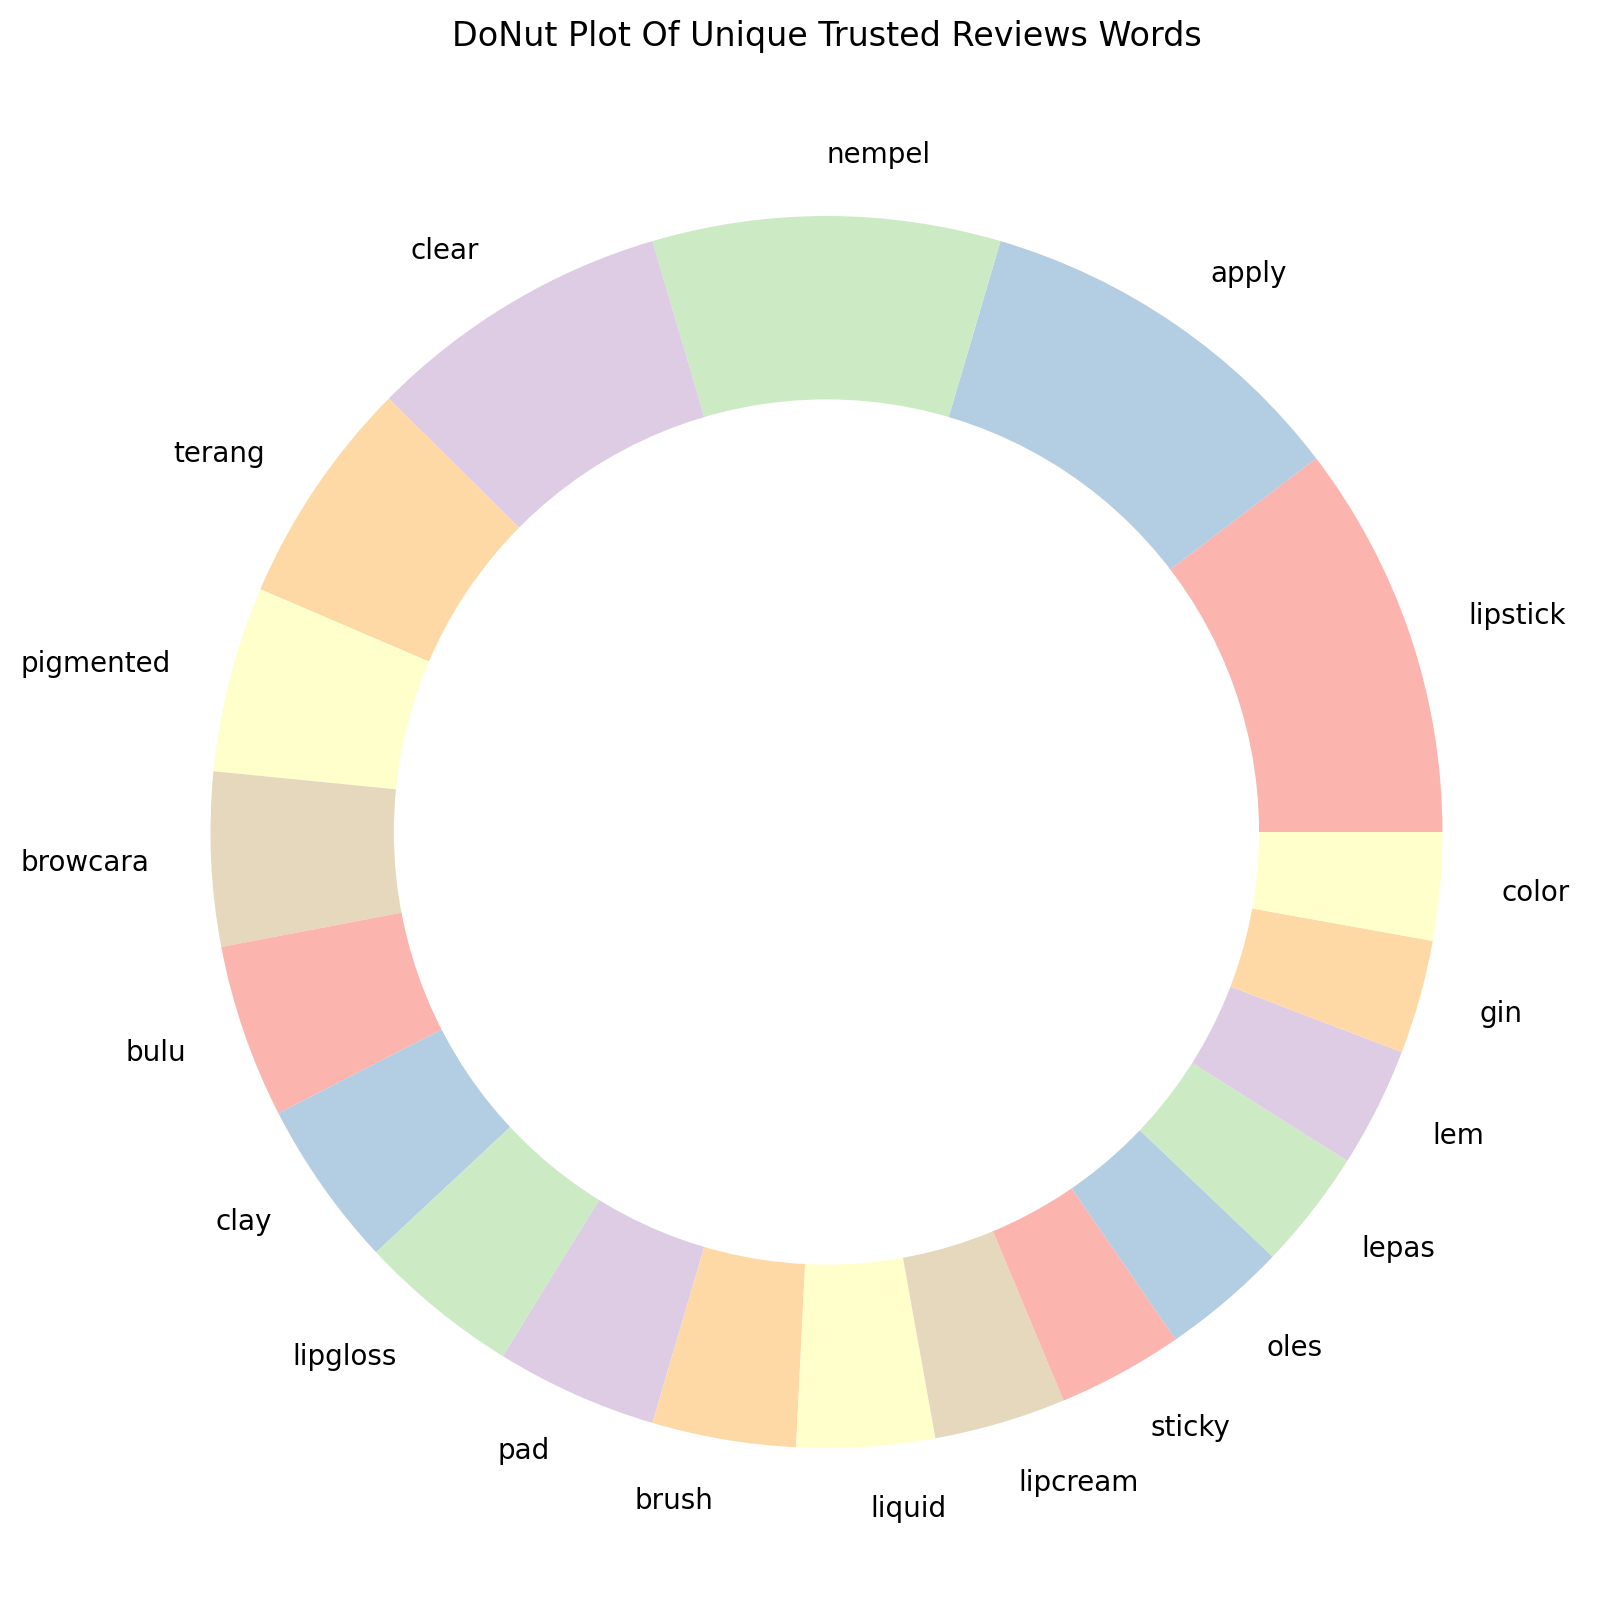

In [98]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Trusted['count'], labels=Unique_Trusted.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Trusted Reviews Words')
plt.show()

### Fake

In [99]:
Unique_Fake= words_unique('fake', 20, raw_text)
print("The top 10 unique words in Fake Reviews are:")
Unique_Fake.style.background_gradient(cmap='Reds')

The top 10 unique words in Fake Reviews are:


,words,count
0,benci,27
1,kantung,26
2,layak,16
3,sheet,13
4,ekstra,12
5,rendah,12
6,takjub,11
7,singkat,10
8,nyerep,10
9,bund,10


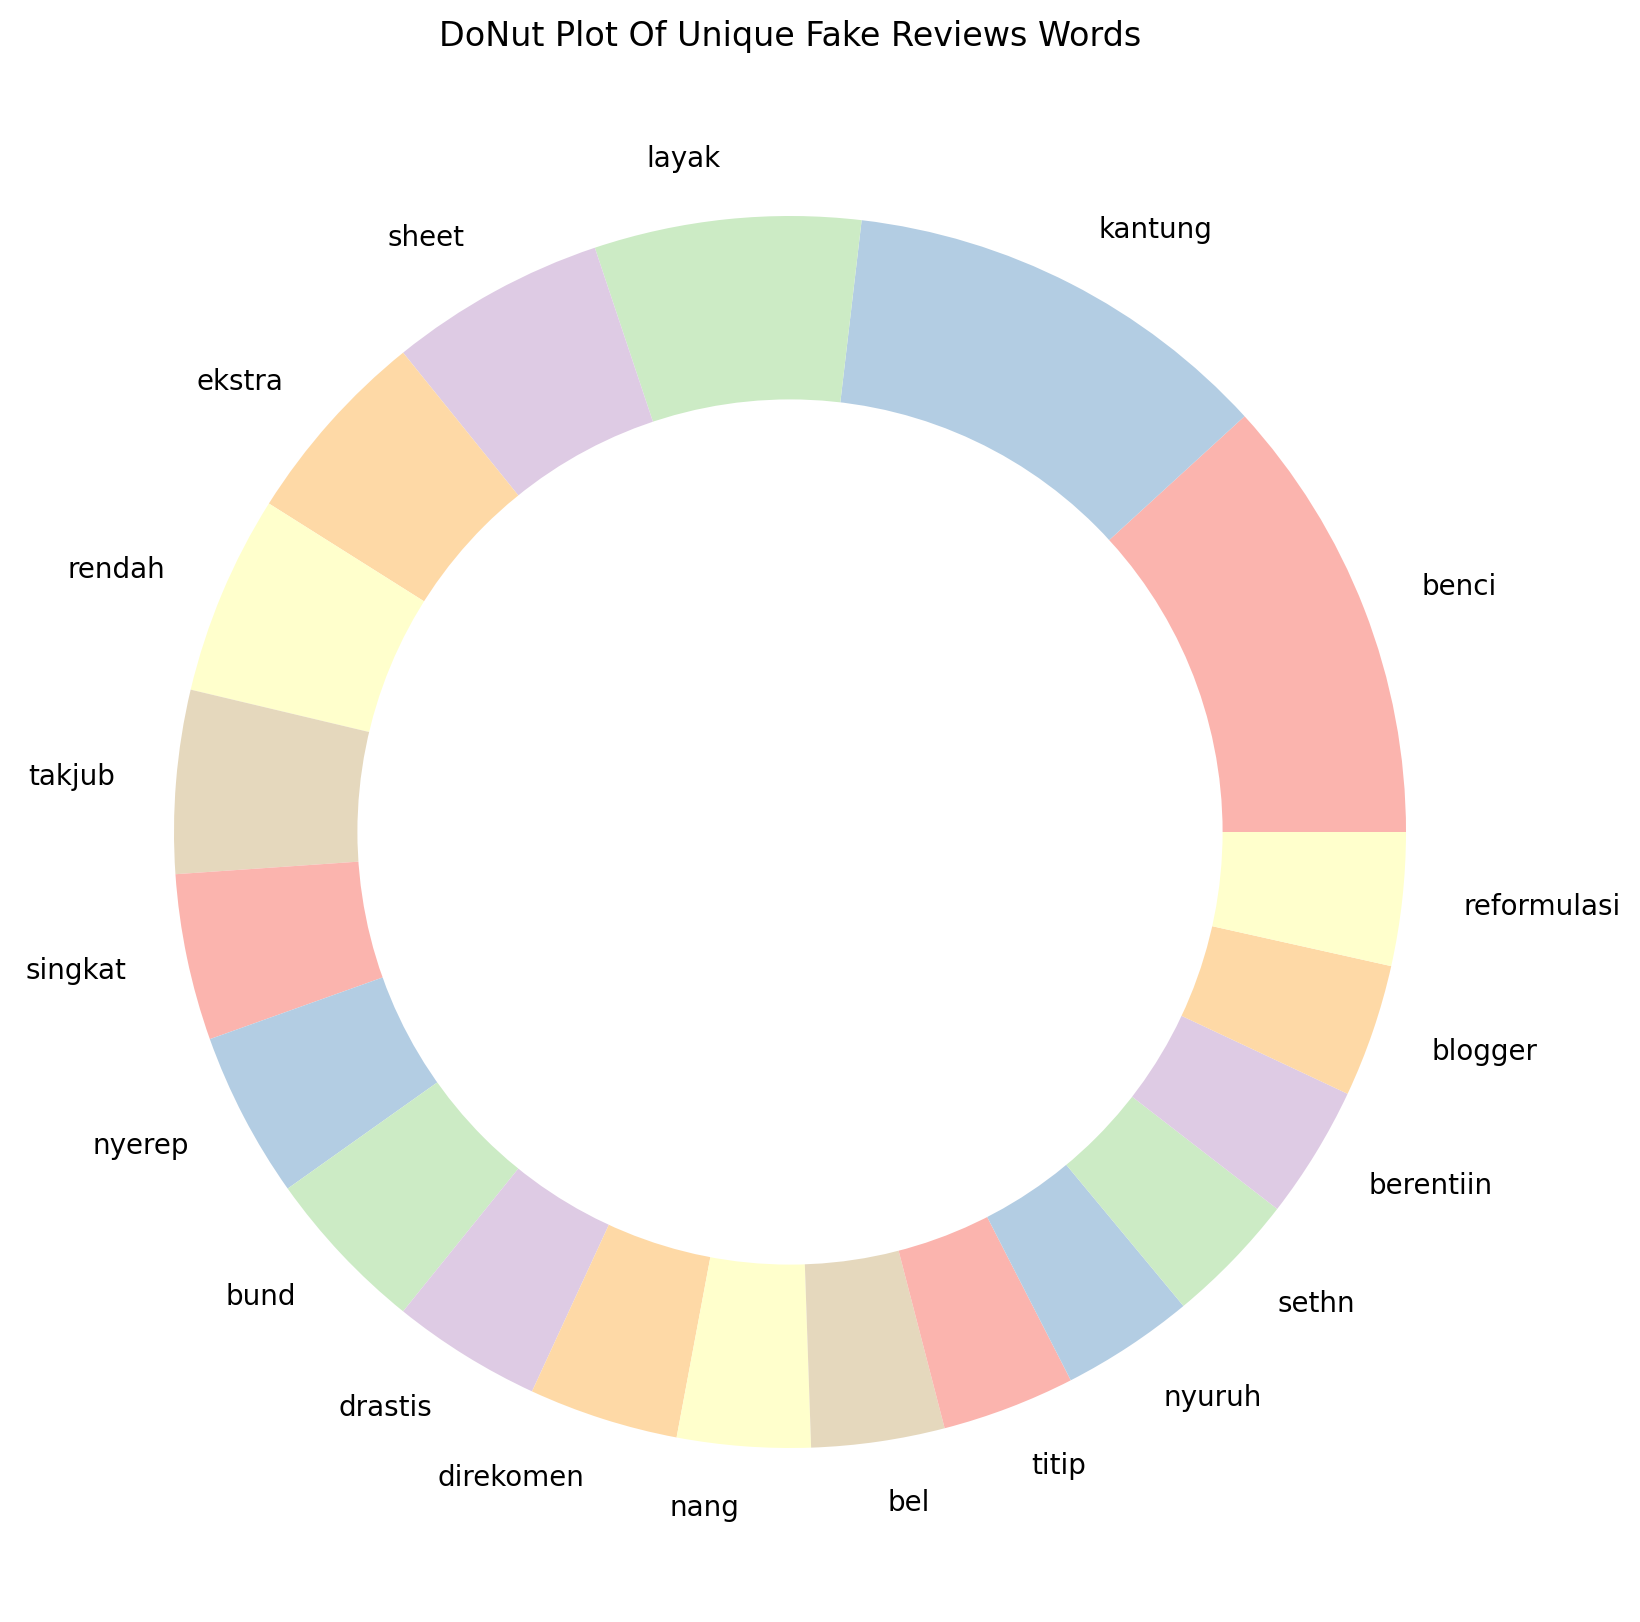

In [100]:
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Fake['count'], labels=Unique_Fake.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Fake Reviews Words')
plt.show()

### Non

In [101]:
Unique_Non= words_unique('non', 20, raw_text)
print("The top 20 unique words in Non Reviews are:")
Unique_Non.style.background_gradient(cmap='gist_gray_r')

The top 20 unique words in Non Reviews are:


,words,count
0,belanja,149
1,palsu,142
2,commerce,99
3,shopee,90
4,berita,75
5,platform,69
6,isu,62
7,tokopedia,49
8,fitur,47
9,korban,44


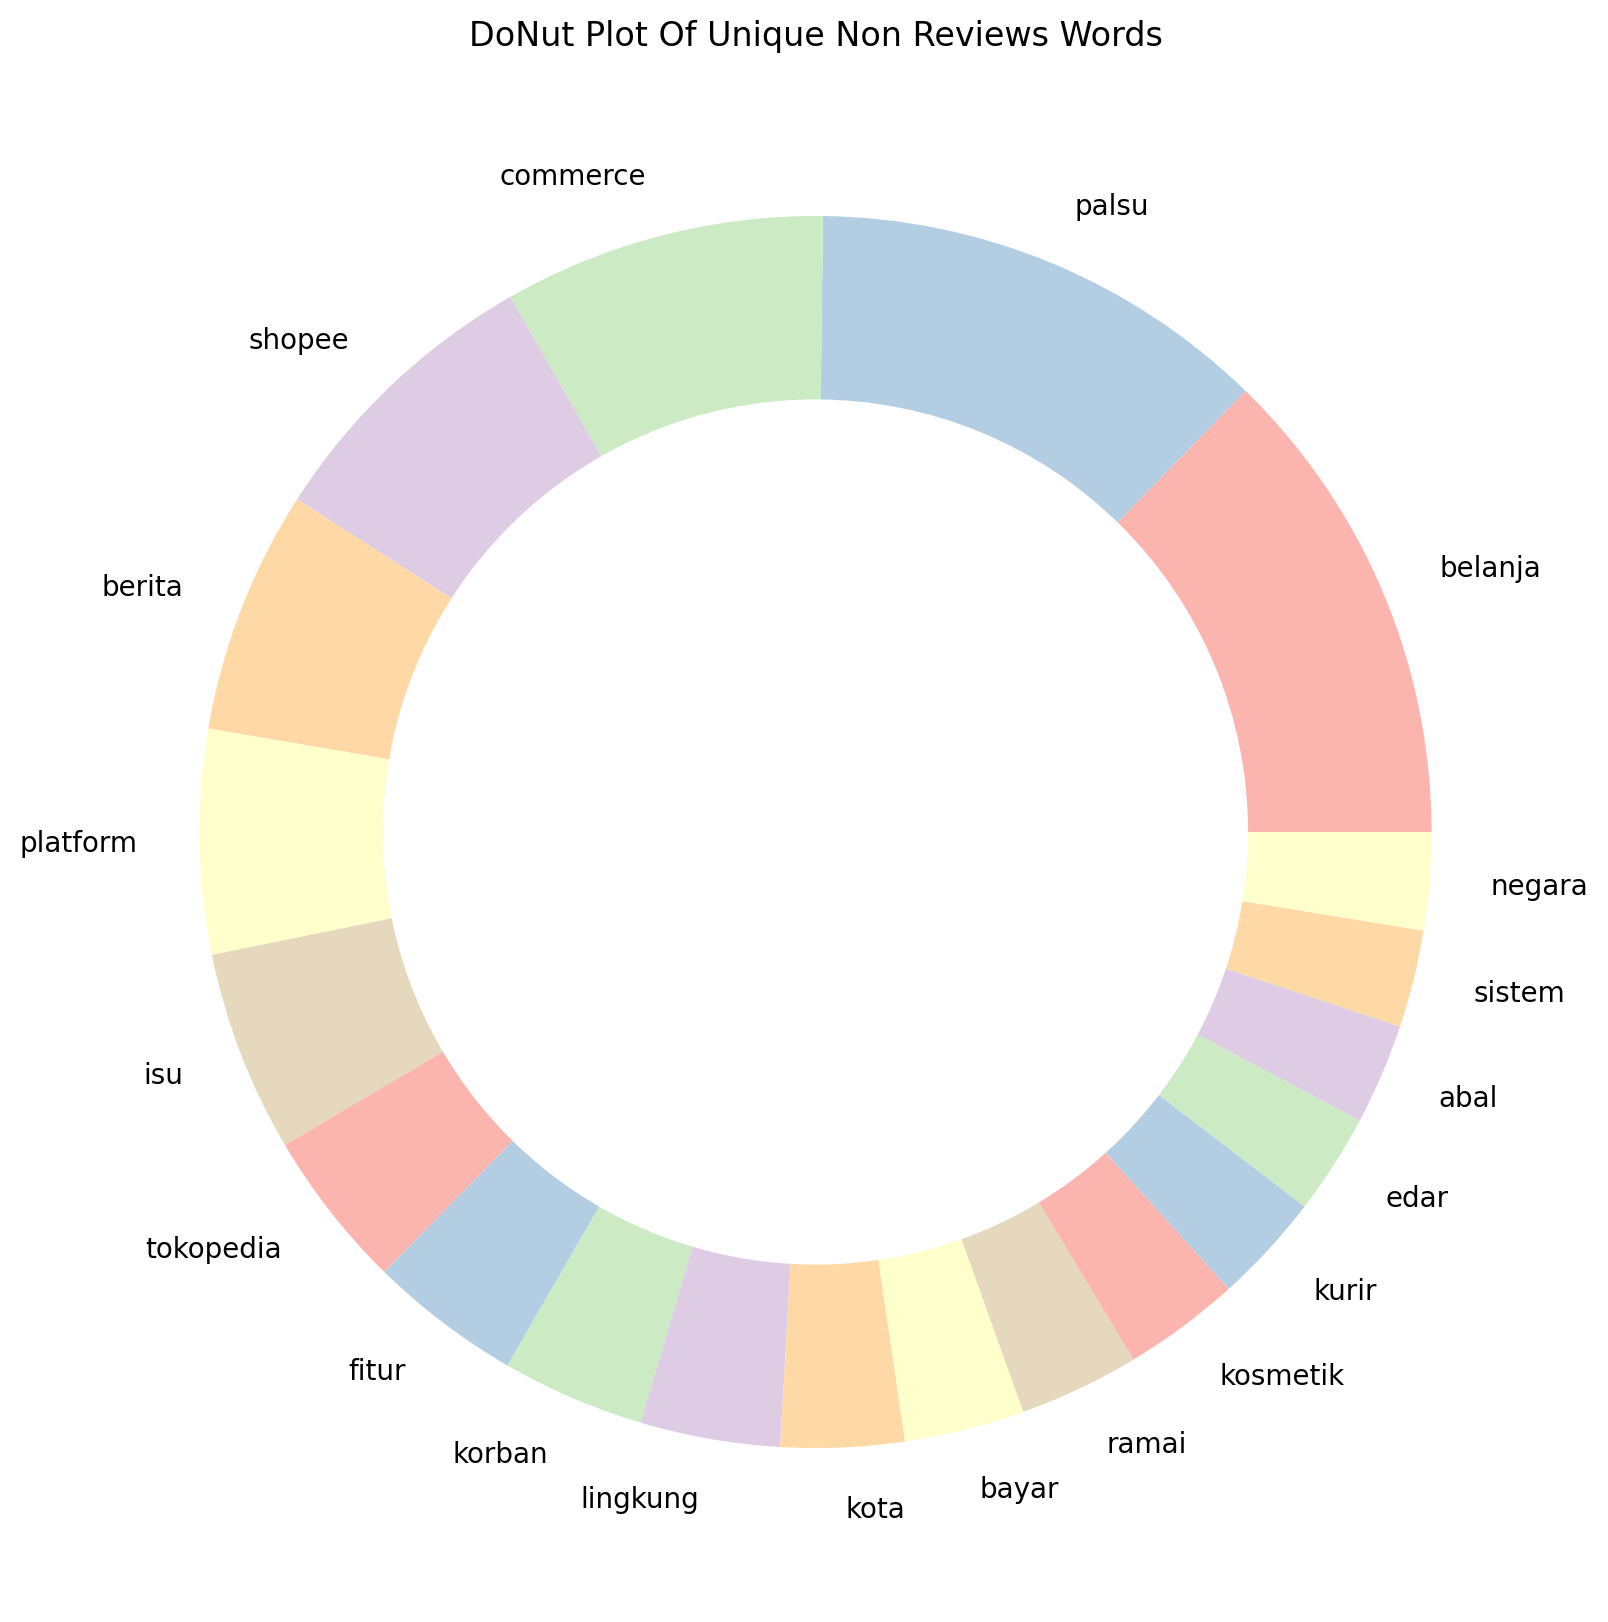

In [102]:
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Non['count'], labels=Unique_Non.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Non Reviews Words')
plt.show()